[김태영-케라스-학습과정 표시하기](https://tykimos.github.io/2017/07/09/Training_Monitoring/)<br>
아래 내용은 상기 링크를 정리한것.

# Training Monitoring

케라스로 딥러닝 모델을 개발할때,<br> 
가장많이 보게 되는것 fit함수가 화면에 찍어주는 로그이다.<br>
이 로그에 포함된 수치들은 학습이 제대로 되고 있는 지,<br> 
학습을 그만할지 등을 판단하는 중요한 척도가 된다.<br>
수치 자체도 큰 의미가 있지만 수치들이 epochs마다 바뀌는 변화 추이를 보는 것이 중요하기 때문에,<br>
그래프로 표시하여 보는 것이 더 직관적이다.<br>
본 절에서는 케라스에서 제공하는 기능을 이용하는 방법,<br>
텐서보드와 연동하여 보는 방법,<br>
콜백함수를 직접 만들어서 사용하는 방법에 대해서 알아본다.<br>
* 히스토리 기능 사용하기
* 텐서보드와 연동하기
* 직접 콜백함수 만들어보기

## 히스토리 기능 사용하기
케라스에서 학습시킬 때 fit 함수를 사용한다.<br>
이 함수의 반환 값으로 히스토리 객체를 얻을 수 있는데,<br>
이 객체는 다음의 정보를 담고 있다.<br>
* 매 epochs 마다의 훈련 손실값(loss)
* 매 epochs 마다의 훈련 정확도(acc)
* 매 epochs 마다의 검증 손실값(val_loss)
* 매 epochs 마다의 검증 정확도(val_acc)
<br>

<br>
히스토리 기능은 케라스의 모든 모델에 탑제되어 있으므로 다른 설정없이 fit 함수의 반환으로 쉽게 확인가능.<br>
사용법은 다음과 같다

In [ ]:
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val_, Y_val))

print(hist.history['lose'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

수치들은 각 epochs마다 해당 값이 추가되므로 배열 형태로 저장 되어 있음.<br>
이러한 수치들은 매 epochs마다 변화되는 추이를 그래프로 표시하여 비교하면서 보면 학습 상태를 직관적으로 관찰할 수 있다.<br>
아래 코드와 같이 matplotlib패키지를 이용하면 하나의 그래프로 쉽게 표시가 가능<br>
* train_loss(노란색): 훈련손실 값이며, x축은 epochs 수, 좌측 y축은 손실값을 나타낸다.
* val_loss(빨간색): 검증 손실값이며, x축은 epochs 수, 좌측 y축은 손실값을 나타낸다. 
* tarin_acc(파란색): 훈련 정화도이며, x축은 epochs 수, 우측 y축은 정확도를 나타낸다.
* val_acc(녹색): 검증 정확도이며, x축은 epochs 수, 우축 y축은 정확도를 나타낸다.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx() #??

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', lable='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
loss_ax.legend(loc='lower left')

plt.show()

손글씨 data set인 MNIST를 다층 퍼셉트론 모델로 학습시키는 간단한 예제로 테스트를 진행.

In [10]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [15]:
np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험 셋로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [16]:
# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
X_train = X_train[:50000]

Y_val = Y_train[50000:]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [17]:
# 훈련셋, 금증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]

X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [18]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [19]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units = 2, input_dim = 28*28, activation = 'relu'))
model.add(Dense(units = 10, activation='softmax'))

In [20]:
# 3. 모델 엮기 # optimizer: Neural Network를 구성하는 알고리즘을 최적화 시켜주는 도구
model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [21]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs = 1000, batch_size=10, validation_data=(X_val, Y_val))

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 8s 12ms/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 460us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 455us/step - loss: 2.1729 - acc: 0.1729 - val_loss: 2.1630 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 459us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1371 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 460us/step - loss: 2.1176 - acc: 0.1900 - val_loss: 2.1140 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 431us/step - loss: 2.0939 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s 430us/step - loss: 2.0719 - acc: 0.2086 - val_loss: 2.0726 - val_acc: 0.2067
Epo

Epoch 120/1000
700/700 [==============================] - 0s 429us/step - loss: 1.6646 - acc: 0.3229 - val_loss: 1.8256 - val_acc: 0.2133
Epoch 121/1000
700/700 [==============================] - 0s 415us/step - loss: 1.6632 - acc: 0.3157 - val_loss: 1.8162 - val_acc: 0.2233
Epoch 122/1000
700/700 [==============================] - 0s 404us/step - loss: 1.6621 - acc: 0.3214 - val_loss: 1.8209 - val_acc: 0.2233
Epoch 123/1000
700/700 [==============================] - 0s 444us/step - loss: 1.6613 - acc: 0.3186 - val_loss: 1.8172 - val_acc: 0.2233
Epoch 124/1000
700/700 [==============================] - 0s 438us/step - loss: 1.6600 - acc: 0.3157 - val_loss: 1.8252 - val_acc: 0.2367
Epoch 125/1000
700/700 [==============================] - 0s 447us/step - loss: 1.6589 - acc: 0.3186 - val_loss: 1.8298 - val_acc: 0.2367
Epoch 126/1000
700/700 [==============================] - 0s 421us/step - loss: 1.6571 - acc: 0.3186 - val_loss: 1.8256 - val_acc: 0.2267
Epoch 127/1000
700/700 [==========

700/700 [==============================] - 0s 448us/step - loss: 1.5771 - acc: 0.3443 - val_loss: 1.8683 - val_acc: 0.2133
Epoch 239/1000
700/700 [==============================] - 0s 395us/step - loss: 1.5767 - acc: 0.3529 - val_loss: 1.8750 - val_acc: 0.2300
Epoch 240/1000
700/700 [==============================] - 0s 426us/step - loss: 1.5747 - acc: 0.3543 - val_loss: 1.8793 - val_acc: 0.2467
Epoch 241/1000
700/700 [==============================] - 0s 437us/step - loss: 1.5744 - acc: 0.3571 - val_loss: 1.8771 - val_acc: 0.2433
Epoch 242/1000
700/700 [==============================] - 0s 433us/step - loss: 1.5740 - acc: 0.3571 - val_loss: 1.8788 - val_acc: 0.2133
Epoch 243/1000
700/700 [==============================] - 0s 437us/step - loss: 1.5739 - acc: 0.3600 - val_loss: 1.8853 - val_acc: 0.2167
Epoch 244/1000
700/700 [==============================] - 0s 454us/step - loss: 1.5708 - acc: 0.3571 - val_loss: 1.8767 - val_acc: 0.2200
Epoch 245/1000
700/700 [=========================

700/700 [==============================] - 0s 421us/step - loss: 1.5258 - acc: 0.3700 - val_loss: 1.9544 - val_acc: 0.2433
Epoch 357/1000
700/700 [==============================] - 0s 422us/step - loss: 1.5257 - acc: 0.3729 - val_loss: 1.9475 - val_acc: 0.2267
Epoch 358/1000
700/700 [==============================] - 0s 425us/step - loss: 1.5250 - acc: 0.3700 - val_loss: 1.9614 - val_acc: 0.2233
Epoch 359/1000
700/700 [==============================] - 0s 431us/step - loss: 1.5251 - acc: 0.3757 - val_loss: 1.9557 - val_acc: 0.2200
Epoch 360/1000
700/700 [==============================] - 0s 418us/step - loss: 1.5231 - acc: 0.3729 - val_loss: 1.9573 - val_acc: 0.2267
Epoch 361/1000
700/700 [==============================] - 0s 422us/step - loss: 1.5230 - acc: 0.3729 - val_loss: 1.9567 - val_acc: 0.2300
Epoch 362/1000
700/700 [==============================] - 0s 449us/step - loss: 1.5240 - acc: 0.3671 - val_loss: 1.9587 - val_acc: 0.2233
Epoch 363/1000
700/700 [=========================

700/700 [==============================] - 0s 433us/step - loss: 1.4860 - acc: 0.3871 - val_loss: 1.9997 - val_acc: 0.2300
Epoch 475/1000
700/700 [==============================] - 0s 425us/step - loss: 1.4865 - acc: 0.3900 - val_loss: 2.0056 - val_acc: 0.2200
Epoch 476/1000
700/700 [==============================] - 0s 437us/step - loss: 1.4855 - acc: 0.3871 - val_loss: 2.0063 - val_acc: 0.2267
Epoch 477/1000
700/700 [==============================] - 0s 419us/step - loss: 1.4863 - acc: 0.3900 - val_loss: 2.0087 - val_acc: 0.2200
Epoch 478/1000
700/700 [==============================] - 0s 433us/step - loss: 1.4859 - acc: 0.3929 - val_loss: 2.0079 - val_acc: 0.2300
Epoch 479/1000
700/700 [==============================] - 0s 449us/step - loss: 1.4856 - acc: 0.3871 - val_loss: 2.0000 - val_acc: 0.2267
Epoch 480/1000
700/700 [==============================] - 0s 398us/step - loss: 1.4849 - acc: 0.3929 - val_loss: 2.0110 - val_acc: 0.2400
Epoch 481/1000
700/700 [=========================

700/700 [==============================] - 0s 463us/step - loss: 1.4587 - acc: 0.4014 - val_loss: 2.0542 - val_acc: 0.2333
Epoch 593/1000
700/700 [==============================] - 0s 429us/step - loss: 1.4588 - acc: 0.3971 - val_loss: 2.0458 - val_acc: 0.2267
Epoch 594/1000
700/700 [==============================] - 0s 422us/step - loss: 1.4583 - acc: 0.4129 - val_loss: 2.0465 - val_acc: 0.2333
Epoch 595/1000
700/700 [==============================] - 0s 446us/step - loss: 1.4582 - acc: 0.4000 - val_loss: 2.0511 - val_acc: 0.2367
Epoch 596/1000
700/700 [==============================] - 0s 403us/step - loss: 1.4580 - acc: 0.3986 - val_loss: 2.0422 - val_acc: 0.2300
Epoch 597/1000
700/700 [==============================] - 0s 454us/step - loss: 1.4569 - acc: 0.4043 - val_loss: 2.0460 - val_acc: 0.2500
Epoch 598/1000
700/700 [==============================] - 0s 440us/step - loss: 1.4579 - acc: 0.4000 - val_loss: 2.0490 - val_acc: 0.2267
Epoch 599/1000
700/700 [=========================

700/700 [==============================] - 0s 454us/step - loss: 1.4366 - acc: 0.4157 - val_loss: 2.0874 - val_acc: 0.2433
Epoch 711/1000
700/700 [==============================] - 0s 455us/step - loss: 1.4353 - acc: 0.4129 - val_loss: 2.0898 - val_acc: 0.2367
Epoch 712/1000
700/700 [==============================] - 0s 436us/step - loss: 1.4351 - acc: 0.4129 - val_loss: 2.0949 - val_acc: 0.2567
Epoch 713/1000
700/700 [==============================] - 0s 417us/step - loss: 1.4361 - acc: 0.4129 - val_loss: 2.0799 - val_acc: 0.2367
Epoch 714/1000
700/700 [==============================] - 0s 434us/step - loss: 1.4355 - acc: 0.4157 - val_loss: 2.0892 - val_acc: 0.2367
Epoch 715/1000
700/700 [==============================] - 0s 444us/step - loss: 1.4332 - acc: 0.4171 - val_loss: 2.0875 - val_acc: 0.2567
Epoch 716/1000
700/700 [==============================] - 0s 424us/step - loss: 1.4359 - acc: 0.4100 - val_loss: 2.0963 - val_acc: 0.2433
Epoch 717/1000
700/700 [=========================

700/700 [==============================] - 0s 447us/step - loss: 1.4164 - acc: 0.4343 - val_loss: 2.1295 - val_acc: 0.2400
Epoch 829/1000
700/700 [==============================] - 0s 435us/step - loss: 1.4155 - acc: 0.4271 - val_loss: 2.1361 - val_acc: 0.2433
Epoch 830/1000
700/700 [==============================] - 0s 441us/step - loss: 1.4151 - acc: 0.4300 - val_loss: 2.1388 - val_acc: 0.2433
Epoch 831/1000
700/700 [==============================] - 0s 449us/step - loss: 1.4150 - acc: 0.4371 - val_loss: 2.1495 - val_acc: 0.2433
Epoch 832/1000
700/700 [==============================] - 0s 426us/step - loss: 1.4158 - acc: 0.4314 - val_loss: 2.1531 - val_acc: 0.2400
Epoch 833/1000
700/700 [==============================] - 0s 450us/step - loss: 1.4155 - acc: 0.4271 - val_loss: 2.1584 - val_acc: 0.2367
Epoch 834/1000
700/700 [==============================] - 0s 394us/step - loss: 1.4155 - acc: 0.4257 - val_loss: 2.1656 - val_acc: 0.2467
Epoch 835/1000
700/700 [=========================

700/700 [==============================] - 0s 433us/step - loss: 1.3993 - acc: 0.4329 - val_loss: 2.1757 - val_acc: 0.2533
Epoch 947/1000
700/700 [==============================] - 0s 446us/step - loss: 1.3985 - acc: 0.4329 - val_loss: 2.1978 - val_acc: 0.2600
Epoch 948/1000
700/700 [==============================] - 0s 422us/step - loss: 1.3987 - acc: 0.4243 - val_loss: 2.1670 - val_acc: 0.2400
Epoch 949/1000
700/700 [==============================] - 0s 443us/step - loss: 1.3987 - acc: 0.4414 - val_loss: 2.1689 - val_acc: 0.2433
Epoch 950/1000
700/700 [==============================] - 0s 416us/step - loss: 1.3974 - acc: 0.4386 - val_loss: 2.1744 - val_acc: 0.2433
Epoch 951/1000
700/700 [==============================] - 0s 430us/step - loss: 1.3985 - acc: 0.4343 - val_loss: 2.1860 - val_acc: 0.2533
Epoch 952/1000
700/700 [==============================] - 0s 421us/step - loss: 1.3984 - acc: 0.4371 - val_loss: 2.1846 - val_acc: 0.2467
Epoch 953/1000
700/700 [=========================

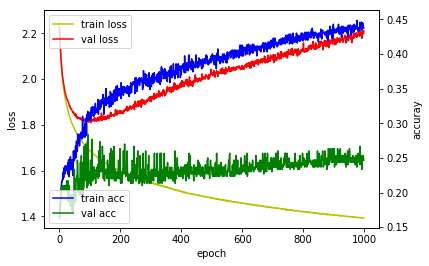

In [27]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

각 epoch에 대한 손실값, 정확도 추이를 볼 수 있다.<br>
검증셋의 손실값이 감소하다가 100 번째 epoch에서 다시 증가 되는 양상을 보인다.<br>
Overfitting(과적합)이 발생했다고 볼 수 있다.<br>
이 경우 100번재 epoch만 학습시킨 모델이 1000번째 epoch까지 학습한 모델보다 실데 테스트에서 더 좋은 결과가 나올 수 있다.<br>

## 텐서보드와 연동하기

텐서플로우에서는 텐서보드라는 훌륭한 학습과정 모니터링 툴을 제공하고 있다.<br>
텐서플로우 기반으로 케라스를 구동하는 경우 이 텐서보드를 사용할 수 있다.<br>
따라서 텐서보드를 이용하기 위해서는 먼저 백엔드를 케라스 설정 파일(keras.json)에서 텐서플로우로 지정해야 한다. 단 경로는 설치 환경에 따라 차이가 날 수 있다.<br>

```
vim ~/.keras/keras.json
```
keras.json 파일을 열어서 다음과 같이 수정.
```
{
    "image_data_format": "channels_last",
    "epsilon": 1e-07,
    "floatx": "float32",
    "backend": "tensorflow"
}
```
여기서 중요한 인자는 backend이다. 이 항목이 **tensorflow** 로 지정되어 있어야 한다.<br>
연동하는 방법은 간단하다.<br>
TensorBorad라는 콜백함수를 생성한뒤 fit함수 인자로 넣어주기만 하면된다.<br>
TensorBoard 콜백함수 생성 시 log_dir인자에 경로를 넣어야 하는데, 이 경로에서 텐서보드와 정보를 주고 받을 수 있는 파일이 생성된다.

In [ ]:
tb_his = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[to_hist])

동일한 예제로 이번에는 텐서보드를 통해 학습 과정을 모니터링 한다.<br>

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
import numpy as np

C:\Users\admin\AppData\Local\conda\conda\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
np.random.seed(3)

In [10]:
# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]

X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [11]:
# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [13]:
# 라벨링 전
print(Y_train)

[1 6 3 4 8 2 8 6 1 5 3 2 9 2 9 6 0 4 6 4 9 9 1 9 8 1 9 0 1 5 1 9 6 7 7 6 7
 9 5 4 6 1 0 0 8 3 2 6 0 4 5 1 4 1 6 8 2 9 7 5 0 4 2 4 1 6 9 9 2 9 5 9 1 0
 1 0 8 4 4 0 5 6 9 5 9 8 4 9 3 8 2 6 0 6 8 8 0 4 9 4 0 2 1 7 7 4 7 9 6 1 8
 5 9 8 7 7 5 4 6 3 7 5 7 1 4 6 7 8 1 0 8 0 8 5 1 8 7 7 0 6 0 3 4 4 8 1 2 7
 5 9 7 2 3 1 2 3 1 3 1 1 0 7 0 3 6 8 1 5 9 0 4 1 9 7 6 9 4 5 6 3 4 0 4 0 5
 7 8 9 5 2 6 6 9 9 7 0 7 9 1 9 1 1 4 0 5 6 6 6 1 5 2 2 0 3 9 8 2 9 9 6 3 0
 2 4 9 4 3 6 0 4 1 1 8 0 8 1 6 1 8 9 9 0 7 2 3 7 2 7 3 8 8 2 1 4 1 4 4 1 8
 0 3 5 8 2 6 4 0 5 9 2 2 5 7 6 4 4 3 5 4 4 0 8 2 1 3 2 8 7 3 7 9 4 3 4 0 0
 1 2 8 6 1 6 2 2 2 4 2 1 8 3 7 4 2 0 4 2 2 7 5 0 5 3 6 8 0 1 9 5 5 6 2 1 5
 9 7 5 3 6 0 4 3 0 1 6 9 8 5 8 4 3 6 3 8 0 2 5 7 7 7 9 8 9 0 3 5 9 6 2 2 1
 2 6 9 3 5 7 6 0 1 3 4 0 5 4 3 6 5 7 3 4 0 9 2 9 2 2 9 2 5 5 6 7 6 5 7 7 4
 5 2 5 8 7 1 2 1 3 0 5 5 8 0 6 3 9 1 0 5 6 7 3 5 1 5 5 7 2 4 0 7 0 4 1 3 4
 1 3 6 0 2 8 6 5 5 8 3 2 0 6 1 8 9 4 8 5 4 0 4 1 3 9 6 0 8 7 7 1 0 6 0 1 7
 7 2 2 8 0 5 5 7 1 0 7 0 

In [14]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [15]:
# 라벨링 후
# one hot encoding으로 변환시킴
print(Y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [21]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [27]:
# 4. 모델 학습시키기
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[tb_hist])

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 1s 2ms/step - loss: 2.2824 - acc: 0.0757 - val_loss: 2.2684 - val_acc: 0.0900
Epoch 2/1000
700/700 [==============================] - 0s 462us/step - loss: 2.2545 - acc: 0.1143 - val_loss: 2.2425 - val_acc: 0.0833
Epoch 3/1000
700/700 [==============================] - 0s 549us/step - loss: 2.2306 - acc: 0.1229 - val_loss: 2.2165 - val_acc: 0.2000
Epoch 4/1000
700/700 [==============================] - 0s 522us/step - loss: 2.2049 - acc: 0.1686 - val_loss: 2.1875 - val_acc: 0.2167
Epoch 5/1000
700/700 [==============================] - 0s 546us/step - loss: 2.1742 - acc: 0.1843 - val_loss: 2.1576 - val_acc: 0.2200
Epoch 6/1000
700/700 [==============================] - 0s 533us/step - loss: 2.1386 - acc: 0.1914 - val_loss: 2.1176 - val_acc: 0.2133
Epoch 7/1000
700/700 [==============================] - 0s 581us/step - loss: 2.0975 - acc: 0.1929 - val_loss: 2.0716 - val_acc: 0.2067
Epoc

700/700 [==============================] - 0s 467us/step - loss: 1.2488 - acc: 0.5343 - val_loss: 1.2989 - val_acc: 0.5200
Epoch 61/1000
700/700 [==============================] - 0s 434us/step - loss: 1.2438 - acc: 0.5400 - val_loss: 1.2985 - val_acc: 0.5167
Epoch 62/1000
700/700 [==============================] - 0s 467us/step - loss: 1.2374 - acc: 0.5429 - val_loss: 1.2954 - val_acc: 0.5167
Epoch 63/1000
700/700 [==============================] - 0s 462us/step - loss: 1.2347 - acc: 0.5429 - val_loss: 1.2919 - val_acc: 0.5167
Epoch 64/1000
700/700 [==============================] - 0s 476us/step - loss: 1.2290 - acc: 0.5486 - val_loss: 1.2867 - val_acc: 0.5267
Epoch 65/1000
700/700 [==============================] - 0s 486us/step - loss: 1.2255 - acc: 0.5386 - val_loss: 1.2901 - val_acc: 0.5233
Epoch 66/1000
700/700 [==============================] - 0s 452us/step - loss: 1.2209 - acc: 0.5429 - val_loss: 1.2864 - val_acc: 0.5267
Epoch 67/1000
700/700 [==============================] 

Epoch 120/1000
700/700 [==============================] - 0s 422us/step - loss: 1.0732 - acc: 0.6043 - val_loss: 1.2374 - val_acc: 0.5400
Epoch 121/1000
700/700 [==============================] - 0s 459us/step - loss: 1.0711 - acc: 0.6014 - val_loss: 1.2429 - val_acc: 0.5333
Epoch 122/1000
700/700 [==============================] - 0s 456us/step - loss: 1.0695 - acc: 0.6143 - val_loss: 1.2444 - val_acc: 0.5300
Epoch 123/1000
700/700 [==============================] - 0s 434us/step - loss: 1.0682 - acc: 0.6086 - val_loss: 1.2415 - val_acc: 0.5300
Epoch 124/1000
700/700 [==============================] - 0s 437us/step - loss: 1.0664 - acc: 0.6057 - val_loss: 1.2396 - val_acc: 0.5333
Epoch 125/1000
700/700 [==============================] - 0s 426us/step - loss: 1.0643 - acc: 0.6171 - val_loss: 1.2407 - val_acc: 0.5367
Epoch 126/1000
700/700 [==============================] - 0s 450us/step - loss: 1.0626 - acc: 0.6100 - val_loss: 1.2384 - val_acc: 0.5433
Epoch 127/1000
700/700 [==========

700/700 [==============================] - 0s 568us/step - loss: 0.9847 - acc: 0.6414 - val_loss: 1.2569 - val_acc: 0.5400
Epoch 180/1000
700/700 [==============================] - 0s 523us/step - loss: 0.9812 - acc: 0.6429 - val_loss: 1.2673 - val_acc: 0.5400
Epoch 181/1000
700/700 [==============================] - 0s 505us/step - loss: 0.9816 - acc: 0.6471 - val_loss: 1.2652 - val_acc: 0.5433
Epoch 182/1000
700/700 [==============================] - 0s 511us/step - loss: 0.9806 - acc: 0.6443 - val_loss: 1.2664 - val_acc: 0.5433
Epoch 183/1000
700/700 [==============================] - 0s 495us/step - loss: 0.9792 - acc: 0.6414 - val_loss: 1.2600 - val_acc: 0.5400
Epoch 184/1000
700/700 [==============================] - 0s 505us/step - loss: 0.9784 - acc: 0.6357 - val_loss: 1.2590 - val_acc: 0.5433
Epoch 185/1000
700/700 [==============================] - 0s 483us/step - loss: 0.9757 - acc: 0.6471 - val_loss: 1.2678 - val_acc: 0.5433
Epoch 186/1000
700/700 [=========================

700/700 [==============================] - 0s 466us/step - loss: 0.9198 - acc: 0.6671 - val_loss: 1.3200 - val_acc: 0.5333
Epoch 239/1000
700/700 [==============================] - 0s 462us/step - loss: 0.9179 - acc: 0.6643 - val_loss: 1.3153 - val_acc: 0.5367
Epoch 240/1000
700/700 [==============================] - 0s 453us/step - loss: 0.9181 - acc: 0.6714 - val_loss: 1.3146 - val_acc: 0.5367
Epoch 241/1000
700/700 [==============================] - 0s 461us/step - loss: 0.9169 - acc: 0.6729 - val_loss: 1.3137 - val_acc: 0.5400
Epoch 242/1000
700/700 [==============================] - 0s 479us/step - loss: 0.9151 - acc: 0.6757 - val_loss: 1.3221 - val_acc: 0.5367
Epoch 243/1000
700/700 [==============================] - 0s 463us/step - loss: 0.9152 - acc: 0.6771 - val_loss: 1.3238 - val_acc: 0.5300
Epoch 244/1000
700/700 [==============================] - 0s 461us/step - loss: 0.9138 - acc: 0.6643 - val_loss: 1.3105 - val_acc: 0.5367
Epoch 245/1000
700/700 [=========================

700/700 [==============================] - 0s 495us/step - loss: 0.8677 - acc: 0.6929 - val_loss: 1.3672 - val_acc: 0.5233
Epoch 298/1000
700/700 [==============================] - 0s 446us/step - loss: 0.8656 - acc: 0.6914 - val_loss: 1.3676 - val_acc: 0.5233
Epoch 299/1000
700/700 [==============================] - 0s 482us/step - loss: 0.8657 - acc: 0.6929 - val_loss: 1.3783 - val_acc: 0.5233
Epoch 300/1000
700/700 [==============================] - 0s 487us/step - loss: 0.8642 - acc: 0.6929 - val_loss: 1.3743 - val_acc: 0.5267
Epoch 301/1000
700/700 [==============================] - 0s 487us/step - loss: 0.8644 - acc: 0.6943 - val_loss: 1.3760 - val_acc: 0.5233
Epoch 302/1000
700/700 [==============================] - 0s 467us/step - loss: 0.8639 - acc: 0.6886 - val_loss: 1.3776 - val_acc: 0.5233
Epoch 303/1000
700/700 [==============================] - 0s 487us/step - loss: 0.8631 - acc: 0.6957 - val_loss: 1.3696 - val_acc: 0.5233
Epoch 304/1000
700/700 [=========================

700/700 [==============================] - 0s 461us/step - loss: 0.8270 - acc: 0.7114 - val_loss: 1.4346 - val_acc: 0.5100
Epoch 357/1000
700/700 [==============================] - 0s 491us/step - loss: 0.8255 - acc: 0.7114 - val_loss: 1.4337 - val_acc: 0.5100
Epoch 358/1000
700/700 [==============================] - 0s 475us/step - loss: 0.8248 - acc: 0.7129 - val_loss: 1.4317 - val_acc: 0.5100
Epoch 359/1000
700/700 [==============================] - 0s 486us/step - loss: 0.8246 - acc: 0.7114 - val_loss: 1.4401 - val_acc: 0.5133
Epoch 360/1000
700/700 [==============================] - 0s 462us/step - loss: 0.8234 - acc: 0.7100 - val_loss: 1.4461 - val_acc: 0.5067
Epoch 361/1000
700/700 [==============================] - 0s 467us/step - loss: 0.8218 - acc: 0.7071 - val_loss: 1.4350 - val_acc: 0.5167
Epoch 362/1000
700/700 [==============================] - 0s 443us/step - loss: 0.8229 - acc: 0.7071 - val_loss: 1.4404 - val_acc: 0.5067
Epoch 363/1000
700/700 [=========================

700/700 [==============================] - 0s 509us/step - loss: 0.7910 - acc: 0.7200 - val_loss: 1.5066 - val_acc: 0.5167
Epoch 416/1000
700/700 [==============================] - 0s 490us/step - loss: 0.7898 - acc: 0.7229 - val_loss: 1.5165 - val_acc: 0.5200
Epoch 417/1000
700/700 [==============================] - 0s 466us/step - loss: 0.7901 - acc: 0.7214 - val_loss: 1.5087 - val_acc: 0.5233
Epoch 418/1000
700/700 [==============================] - 0s 502us/step - loss: 0.7879 - acc: 0.7257 - val_loss: 1.5108 - val_acc: 0.5300
Epoch 419/1000
700/700 [==============================] - 0s 460us/step - loss: 0.7893 - acc: 0.7271 - val_loss: 1.5103 - val_acc: 0.5133
Epoch 420/1000
700/700 [==============================] - 0s 487us/step - loss: 0.7876 - acc: 0.7214 - val_loss: 1.5149 - val_acc: 0.5200
Epoch 421/1000
700/700 [==============================] - 0s 485us/step - loss: 0.7858 - acc: 0.7243 - val_loss: 1.5128 - val_acc: 0.5167
Epoch 422/1000
700/700 [=========================

700/700 [==============================] - 0s 475us/step - loss: 0.7621 - acc: 0.7357 - val_loss: 1.5700 - val_acc: 0.5167
Epoch 475/1000
700/700 [==============================] - 0s 457us/step - loss: 0.7599 - acc: 0.7271 - val_loss: 1.5729 - val_acc: 0.5133
Epoch 476/1000
700/700 [==============================] - 0s 457us/step - loss: 0.7596 - acc: 0.7314 - val_loss: 1.5858 - val_acc: 0.5233
Epoch 477/1000
700/700 [==============================] - 0s 518us/step - loss: 0.7588 - acc: 0.7329 - val_loss: 1.5821 - val_acc: 0.5233
Epoch 478/1000
700/700 [==============================] - 0s 518us/step - loss: 0.7587 - acc: 0.7300 - val_loss: 1.5803 - val_acc: 0.5133
Epoch 479/1000
700/700 [==============================] - 0s 556us/step - loss: 0.7577 - acc: 0.7371 - val_loss: 1.5722 - val_acc: 0.5100
Epoch 480/1000
700/700 [==============================] - 0s 638us/step - loss: 0.7566 - acc: 0.7343 - val_loss: 1.5718 - val_acc: 0.5100
Epoch 481/1000
700/700 [=========================

700/700 [==============================] - 0s 487us/step - loss: 0.7356 - acc: 0.7414 - val_loss: 1.6390 - val_acc: 0.5033
Epoch 534/1000
700/700 [==============================] - 0s 494us/step - loss: 0.7333 - acc: 0.7386 - val_loss: 1.6384 - val_acc: 0.5100
Epoch 535/1000
700/700 [==============================] - 0s 494us/step - loss: 0.7329 - acc: 0.7429 - val_loss: 1.6473 - val_acc: 0.5100
Epoch 536/1000
700/700 [==============================] - 0s 490us/step - loss: 0.7332 - acc: 0.7414 - val_loss: 1.6444 - val_acc: 0.5067
Epoch 537/1000
700/700 [==============================] - 0s 479us/step - loss: 0.7334 - acc: 0.7429 - val_loss: 1.6362 - val_acc: 0.5000
Epoch 538/1000
700/700 [==============================] - 0s 503us/step - loss: 0.7324 - acc: 0.7457 - val_loss: 1.6404 - val_acc: 0.4967
Epoch 539/1000
700/700 [==============================] - 0s 477us/step - loss: 0.7330 - acc: 0.7371 - val_loss: 1.6423 - val_acc: 0.5000
Epoch 540/1000
700/700 [=========================

700/700 [==============================] - 0s 491us/step - loss: 0.7132 - acc: 0.7457 - val_loss: 1.6930 - val_acc: 0.5067
Epoch 593/1000
700/700 [==============================] - 0s 504us/step - loss: 0.7135 - acc: 0.7471 - val_loss: 1.6941 - val_acc: 0.5033
Epoch 594/1000
700/700 [==============================] - 0s 496us/step - loss: 0.7130 - acc: 0.7443 - val_loss: 1.6980 - val_acc: 0.5033
Epoch 595/1000
700/700 [==============================] - 0s 508us/step - loss: 0.7119 - acc: 0.7500 - val_loss: 1.7055 - val_acc: 0.5067
Epoch 596/1000
700/700 [==============================] - 0s 621us/step - loss: 0.7119 - acc: 0.7486 - val_loss: 1.6951 - val_acc: 0.5000
Epoch 597/1000
700/700 [==============================] - 0s 494us/step - loss: 0.7121 - acc: 0.7486 - val_loss: 1.6997 - val_acc: 0.5100
Epoch 598/1000
700/700 [==============================] - 0s 426us/step - loss: 0.7121 - acc: 0.7471 - val_loss: 1.6983 - val_acc: 0.5067
Epoch 599/1000
700/700 [=========================

700/700 [==============================] - 0s 584us/step - loss: 0.6950 - acc: 0.7557 - val_loss: 1.7489 - val_acc: 0.5033
Epoch 652/1000
700/700 [==============================] - 0s 630us/step - loss: 0.6947 - acc: 0.7571 - val_loss: 1.7525 - val_acc: 0.5067
Epoch 653/1000
700/700 [==============================] - 0s 613us/step - loss: 0.6949 - acc: 0.7514 - val_loss: 1.7541 - val_acc: 0.5033
Epoch 654/1000
700/700 [==============================] - 0s 555us/step - loss: 0.6928 - acc: 0.7600 - val_loss: 1.7469 - val_acc: 0.5000
Epoch 655/1000
700/700 [==============================] - 0s 486us/step - loss: 0.6937 - acc: 0.7557 - val_loss: 1.7514 - val_acc: 0.5033
Epoch 656/1000
700/700 [==============================] - 0s 496us/step - loss: 0.6931 - acc: 0.7586 - val_loss: 1.7555 - val_acc: 0.5067
Epoch 657/1000
700/700 [==============================] - 0s 488us/step - loss: 0.6924 - acc: 0.7600 - val_loss: 1.7525 - val_acc: 0.5033
Epoch 658/1000
700/700 [=========================

700/700 [==============================] - 0s 515us/step - loss: 0.6770 - acc: 0.7657 - val_loss: 1.8143 - val_acc: 0.4967
Epoch 711/1000
700/700 [==============================] - 0s 506us/step - loss: 0.6773 - acc: 0.7614 - val_loss: 1.8194 - val_acc: 0.5000
Epoch 712/1000
700/700 [==============================] - 0s 434us/step - loss: 0.6767 - acc: 0.7614 - val_loss: 1.8148 - val_acc: 0.5000
Epoch 713/1000
700/700 [==============================] - 1s 922us/step - loss: 0.6765 - acc: 0.7643 - val_loss: 1.8164 - val_acc: 0.5000
Epoch 714/1000
700/700 [==============================] - 0s 555us/step - loss: 0.6761 - acc: 0.7629 - val_loss: 1.8268 - val_acc: 0.5033
Epoch 715/1000
700/700 [==============================] - 0s 464us/step - loss: 0.6767 - acc: 0.7614 - val_loss: 1.8153 - val_acc: 0.5000
Epoch 716/1000
700/700 [==============================] - 0s 433us/step - loss: 0.6756 - acc: 0.7686 - val_loss: 1.8098 - val_acc: 0.5000
Epoch 717/1000
700/700 [=========================

700/700 [==============================] - 0s 446us/step - loss: 0.6625 - acc: 0.7743 - val_loss: 1.8539 - val_acc: 0.4967
Epoch 770/1000
700/700 [==============================] - 0s 410us/step - loss: 0.6627 - acc: 0.7671 - val_loss: 1.8627 - val_acc: 0.4967
Epoch 771/1000
700/700 [==============================] - 0s 437us/step - loss: 0.6622 - acc: 0.7714 - val_loss: 1.8546 - val_acc: 0.4933
Epoch 772/1000
700/700 [==============================] - 0s 431us/step - loss: 0.6616 - acc: 0.7714 - val_loss: 1.8540 - val_acc: 0.4967
Epoch 773/1000
700/700 [==============================] - 0s 433us/step - loss: 0.6611 - acc: 0.7743 - val_loss: 1.8569 - val_acc: 0.4967
Epoch 774/1000
700/700 [==============================] - 0s 476us/step - loss: 0.6616 - acc: 0.7714 - val_loss: 1.8580 - val_acc: 0.4967
Epoch 775/1000
700/700 [==============================] - 0s 462us/step - loss: 0.6609 - acc: 0.7743 - val_loss: 1.8710 - val_acc: 0.4967
Epoch 776/1000
700/700 [=========================

700/700 [==============================] - 0s 438us/step - loss: 0.6501 - acc: 0.7786 - val_loss: 1.8995 - val_acc: 0.5033
Epoch 829/1000
700/700 [==============================] - 0s 419us/step - loss: 0.6500 - acc: 0.7771 - val_loss: 1.9094 - val_acc: 0.5000
Epoch 830/1000
700/700 [==============================] - 0s 432us/step - loss: 0.6498 - acc: 0.7800 - val_loss: 1.8899 - val_acc: 0.5000
Epoch 831/1000
700/700 [==============================] - 0s 432us/step - loss: 0.6497 - acc: 0.7800 - val_loss: 1.8942 - val_acc: 0.5000
Epoch 832/1000
700/700 [==============================] - 0s 417us/step - loss: 0.6496 - acc: 0.7771 - val_loss: 1.8989 - val_acc: 0.5000
Epoch 833/1000
700/700 [==============================] - 0s 420us/step - loss: 0.6490 - acc: 0.7800 - val_loss: 1.8941 - val_acc: 0.4967
Epoch 834/1000
700/700 [==============================] - 0s 417us/step - loss: 0.6489 - acc: 0.7786 - val_loss: 1.9008 - val_acc: 0.5033
Epoch 835/1000
700/700 [=========================

700/700 [==============================] - 0s 436us/step - loss: 0.6397 - acc: 0.7800 - val_loss: 1.9344 - val_acc: 0.5033
Epoch 888/1000
700/700 [==============================] - 0s 406us/step - loss: 0.6389 - acc: 0.7800 - val_loss: 1.9299 - val_acc: 0.5033
Epoch 889/1000
700/700 [==============================] - 0s 408us/step - loss: 0.6390 - acc: 0.7800 - val_loss: 1.9231 - val_acc: 0.5000
Epoch 890/1000
700/700 [==============================] - 0s 416us/step - loss: 0.6391 - acc: 0.7814 - val_loss: 1.9397 - val_acc: 0.4900
Epoch 891/1000
700/700 [==============================] - 0s 434us/step - loss: 0.6397 - acc: 0.7814 - val_loss: 1.9406 - val_acc: 0.5033
Epoch 892/1000
700/700 [==============================] - 0s 427us/step - loss: 0.6391 - acc: 0.7814 - val_loss: 1.9353 - val_acc: 0.5067
Epoch 893/1000
700/700 [==============================] - 0s 420us/step - loss: 0.6386 - acc: 0.7814 - val_loss: 1.9346 - val_acc: 0.5033
Epoch 894/1000
700/700 [=========================

700/700 [==============================] - 0s 523us/step - loss: 0.6309 - acc: 0.7814 - val_loss: 1.9667 - val_acc: 0.5033
Epoch 947/1000
700/700 [==============================] - 0s 562us/step - loss: 0.6309 - acc: 0.7800 - val_loss: 1.9638 - val_acc: 0.5067
Epoch 948/1000
700/700 [==============================] - 0s 511us/step - loss: 0.6307 - acc: 0.7814 - val_loss: 1.9685 - val_acc: 0.5000
Epoch 949/1000
700/700 [==============================] - 0s 546us/step - loss: 0.6306 - acc: 0.7800 - val_loss: 1.9714 - val_acc: 0.5100
Epoch 950/1000
700/700 [==============================] - 0s 500us/step - loss: 0.6301 - acc: 0.7800 - val_loss: 1.9759 - val_acc: 0.5067
Epoch 951/1000
700/700 [==============================] - 0s 528us/step - loss: 0.6300 - acc: 0.7814 - val_loss: 1.9650 - val_acc: 0.5033
Epoch 952/1000
700/700 [==============================] - 0s 513us/step - loss: 0.6305 - acc: 0.7829 - val_loss: 1.9683 - val_acc: 0.5067
Epoch 953/1000
700/700 [=========================

TensorBoard 콜백함수 생성 시 logdir 인자로 지정한 로컬의 graph라는 폴더 안을 보면 events로 시작하는 파일이 생성되는 것을 확인 할 수 있다.<br> 
콘솔에서 아래 명령으로 텐서보드를 실행한다.<br> 
여기서 주의할 사항은 -logdir 인자에는 graph폴더의 절대 경로로 지정해야 한다.<br> 

리눅스에서로 추측됨
```
tensorboard --logdir=~/Projects/Keras/_writing/graph
```
windows cmd 환경에서
```
tensorboard --logdir=C:\Users\admin\insung\Learn-Machine-Learning\keras\block_keras\What_is_deep_learning\graph
```
즉 위에서 설정한 폴더로 경로('./graph')를 잡아야한다.<br>
tb_hist = keras.callbacks.TensorBoard(log_dir=**'./graph'**, histogram_freq=0, write_graph=True, write_images=True)<br>

### 직접 콜백함수 만들어보기
기본적인 모델의 학습 상태 모니터링은 앞서 소개한 히스토리 콜백함수나 텐서보드를 이용하면되지만,<br>
RNN(순환신경망) 모델인 경우 fit 함수를 여러번 호출되기 떄문에 제대로 학습상태를 볼 수가 없다.<br>

In [ ]:
for epoch_idx in range(1000): 
    print("epochs : " + str(epoch_idx))
    hist = model.fit(train_X, train_Y, epochs=1, batch_size=1, verbose=2, shuffle=False) # 50 is X.shape[0]
    model.reset_states()

매 epoch마다 history객체가 생성되어 매번 초기화가 되기 때문에 epoch별로 추이를 볼 수가 없다.<br>
이 문제를 해결하기 위해 fit함수를 여러번 호출되더라도 학습 상태가 유지될 수 있도록 콜백함수를 정의한다.<br>

In [29]:
import keras

# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def __init__(self):
        self.losses = []
        self.vol_losses = []
        self.accs = []
        self.vol_accs = []
    
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.vol_losses.append(logs.get('vol_loss'))
        self.accs.append(logs.get('acc'))
        self.vol_accs.append(logs.get('acc_loss'))

새로 만든 콜백함수를 이용해서 학습 상태를 모니터링 한다.<br>
이전 코드에서 fit 함수 내에서 1000번 epoch를 수행했던 history기록을 한 번 epoch를 수행 하는 fit 함수를 천 번 호출 하는 방식으로 수정.<br>
참고로 fit 함수를 한 번 호출해서 epoch를 여러번 수행하는 것과 fit함수를 여러번 호출하는 것은 동일한 효과를 얻을 수 있따.<br>

In [36]:
import keras

# 사용자 정의 히스토리 클래스 정의
class _CustomHistory(keras.callbacks.Callback):
    def __init__(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

# 모델 학습 시키기

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비

# 훈련, 시험 셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련, 검증 셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]

X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
x_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [37]:
# 훈련, 검증 셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]

X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [38]:
#  라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [40]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [41]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [44]:
# 4. 모델 학습시키기
custom_hist = _CustomHistory()
custom_hist.__init__()

for epoch_idx in range(10000):
    print('epoch : ' + str(epoch_idx))
    model.fit(X_train, Y_train, epochs=1, batch_size=10, validation_data=(X_val, Y_val), callbacks=[custom_hist])

epoch : 0
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 1s 772us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
epoch : 1
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 501us/step - loss: 2.2067 - acc: 0.1786 - val_loss: 2.1906 - val_acc: 0.1800
epoch : 2
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 500us/step - loss: 2.1733 - acc: 0.1829 - val_loss: 2.1641 - val_acc: 0.1800
epoch : 3
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 471us/step - loss: 2.1446 - acc: 0.1957 - val_loss: 2.1409 - val_acc: 0.1833
epoch : 4
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 463us/step - loss: 2.1186 - acc: 0.1929 - val_loss: 2.1151 - val_acc: 0.2033
epoch : 5
Train on 700 samples, validate on 300 samples

700/700 [==============================] - 0s 466us/step - loss: 1.8008 - acc: 0.2371 - val_loss: 1.8574 - val_acc: 0.1967
epoch : 44
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 482us/step - loss: 1.7976 - acc: 0.2486 - val_loss: 1.8582 - val_acc: 0.1933
epoch : 45
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 481us/step - loss: 1.7943 - acc: 0.2471 - val_loss: 1.8558 - val_acc: 0.1733
epoch : 46
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 440us/step - loss: 1.7914 - acc: 0.2400 - val_loss: 1.8556 - val_acc: 0.1833
epoch : 47
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 456us/step - loss: 1.7886 - acc: 0.2429 - val_loss: 1.8548 - val_acc: 0.2067
epoch : 48
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 475u

700/700 [==============================] - 0s 466us/step - loss: 1.7066 - acc: 0.3086 - val_loss: 1.8146 - val_acc: 0.2633
epoch : 87
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 460us/step - loss: 1.7058 - acc: 0.2914 - val_loss: 1.8129 - val_acc: 0.2233
epoch : 88
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 479us/step - loss: 1.7035 - acc: 0.2900 - val_loss: 1.8254 - val_acc: 0.2300
epoch : 89
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 454us/step - loss: 1.7024 - acc: 0.2914 - val_loss: 1.8209 - val_acc: 0.2700
epoch : 90
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 459us/step - loss: 1.7010 - acc: 0.3100 - val_loss: 1.8199 - val_acc: 0.2200
epoch : 91
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 455u

700/700 [==============================] - 0s 481us/step - loss: 1.6546 - acc: 0.3214 - val_loss: 1.8173 - val_acc: 0.2700
epoch : 130
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 498us/step - loss: 1.6550 - acc: 0.3200 - val_loss: 1.8226 - val_acc: 0.2600
epoch : 131
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 527us/step - loss: 1.6542 - acc: 0.3143 - val_loss: 1.8179 - val_acc: 0.2233
epoch : 132
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 455us/step - loss: 1.6520 - acc: 0.3271 - val_loss: 1.8165 - val_acc: 0.2267
epoch : 133
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 490us/step - loss: 1.6508 - acc: 0.3200 - val_loss: 1.8151 - val_acc: 0.2500
epoch : 134
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 462us/step - loss: 1.6203 - acc: 0.3229 - val_loss: 1.8480 - val_acc: 0.2267
epoch : 173
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 440us/step - loss: 1.6184 - acc: 0.3300 - val_loss: 1.8401 - val_acc: 0.2200
epoch : 174
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 487us/step - loss: 1.6170 - acc: 0.3329 - val_loss: 1.8458 - val_acc: 0.2200
epoch : 175
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.6156 - acc: 0.3157 - val_loss: 1.8282 - val_acc: 0.2600
epoch : 176
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 475us/step - loss: 1.6169 - acc: 0.3214 - val_loss: 1.8382 - val_acc: 0.2367
epoch : 177
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 495us/step - loss: 1.5895 - acc: 0.3429 - val_loss: 1.8554 - val_acc: 0.2267
epoch : 216
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 466us/step - loss: 1.5883 - acc: 0.3414 - val_loss: 1.8603 - val_acc: 0.2233
epoch : 217
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.5883 - acc: 0.3429 - val_loss: 1.8596 - val_acc: 0.2200
epoch : 218
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 442us/step - loss: 1.5869 - acc: 0.3443 - val_loss: 1.8592 - val_acc: 0.2100
epoch : 219
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 448us/step - loss: 1.5869 - acc: 0.3486 - val_loss: 1.8683 - val_acc: 0.2200
epoch : 220
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 454us/step - loss: 1.5663 - acc: 0.3643 - val_loss: 1.9055 - val_acc: 0.2233
epoch : 259
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 467us/step - loss: 1.5659 - acc: 0.3400 - val_loss: 1.8771 - val_acc: 0.2167
epoch : 260
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.5658 - acc: 0.3486 - val_loss: 1.8797 - val_acc: 0.2300
epoch : 261
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 466us/step - loss: 1.5649 - acc: 0.3500 - val_loss: 1.8847 - val_acc: 0.2233
epoch : 262
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 456us/step - loss: 1.5642 - acc: 0.3586 - val_loss: 1.8807 - val_acc: 0.2267
epoch : 263
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 498us/step - loss: 1.5479 - acc: 0.3671 - val_loss: 1.9005 - val_acc: 0.2200
epoch : 302
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 462us/step - loss: 1.5472 - acc: 0.3686 - val_loss: 1.9106 - val_acc: 0.2333
epoch : 303
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 433us/step - loss: 1.5455 - acc: 0.3600 - val_loss: 1.9103 - val_acc: 0.2200
epoch : 304
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 469us/step - loss: 1.5454 - acc: 0.3600 - val_loss: 1.9080 - val_acc: 0.2233
epoch : 305
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 486us/step - loss: 1.5458 - acc: 0.3571 - val_loss: 1.9002 - val_acc: 0.2233
epoch : 306
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 472us/step - loss: 1.5298 - acc: 0.3700 - val_loss: 1.9526 - val_acc: 0.2400
epoch : 345
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.5299 - acc: 0.3614 - val_loss: 1.9466 - val_acc: 0.2300
epoch : 346
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 491us/step - loss: 1.5288 - acc: 0.3729 - val_loss: 1.9398 - val_acc: 0.2200
epoch : 347
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 474us/step - loss: 1.5289 - acc: 0.3786 - val_loss: 1.9400 - val_acc: 0.2333
epoch : 348
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.5289 - acc: 0.3686 - val_loss: 1.9257 - val_acc: 0.2133
epoch : 349
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 464us/step - loss: 1.5151 - acc: 0.3743 - val_loss: 1.9569 - val_acc: 0.2200
epoch : 388
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 485us/step - loss: 1.5139 - acc: 0.3814 - val_loss: 1.9735 - val_acc: 0.2367
epoch : 389
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 480us/step - loss: 1.5140 - acc: 0.3600 - val_loss: 1.9512 - val_acc: 0.2233
epoch : 390
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 473us/step - loss: 1.5136 - acc: 0.3786 - val_loss: 1.9669 - val_acc: 0.2200
epoch : 391
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 472us/step - loss: 1.5138 - acc: 0.3714 - val_loss: 1.9538 - val_acc: 0.2300
epoch : 392
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 451us/step - loss: 1.5017 - acc: 0.3914 - val_loss: 1.9830 - val_acc: 0.2200
epoch : 431
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 454us/step - loss: 1.5022 - acc: 0.3829 - val_loss: 1.9904 - val_acc: 0.2200
epoch : 432
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 447us/step - loss: 1.4996 - acc: 0.3800 - val_loss: 1.9784 - val_acc: 0.2400
epoch : 433
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 442us/step - loss: 1.5015 - acc: 0.3843 - val_loss: 1.9851 - val_acc: 0.2233
epoch : 434
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 459us/step - loss: 1.5003 - acc: 0.3729 - val_loss: 1.9866 - val_acc: 0.2167
epoch : 435
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 456us/step - loss: 1.4885 - acc: 0.3771 - val_loss: 2.0079 - val_acc: 0.2233
epoch : 474
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 459us/step - loss: 1.4907 - acc: 0.3771 - val_loss: 2.0065 - val_acc: 0.2233
epoch : 475
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.4875 - acc: 0.3743 - val_loss: 2.0010 - val_acc: 0.2300
epoch : 476
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 467us/step - loss: 1.4901 - acc: 0.3814 - val_loss: 2.0177 - val_acc: 0.2333
epoch : 477
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 463us/step - loss: 1.4894 - acc: 0.3857 - val_loss: 1.9992 - val_acc: 0.2200
epoch : 478
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 460us/step - loss: 1.4794 - acc: 0.3814 - val_loss: 2.0243 - val_acc: 0.2367
epoch : 517
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 469us/step - loss: 1.4792 - acc: 0.3957 - val_loss: 2.0172 - val_acc: 0.2233
epoch : 518
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 453us/step - loss: 1.4789 - acc: 0.3900 - val_loss: 2.0300 - val_acc: 0.2267
epoch : 519
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 476us/step - loss: 1.4775 - acc: 0.3943 - val_loss: 2.0194 - val_acc: 0.2433
epoch : 520
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 442us/step - loss: 1.4785 - acc: 0.3886 - val_loss: 2.0284 - val_acc: 0.2367
epoch : 521
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 460us/step - loss: 1.4684 - acc: 0.3986 - val_loss: 2.0348 - val_acc: 0.2467
epoch : 560
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 438us/step - loss: 1.4687 - acc: 0.3957 - val_loss: 2.0493 - val_acc: 0.2333
epoch : 561
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 447us/step - loss: 1.4686 - acc: 0.3900 - val_loss: 2.0433 - val_acc: 0.2400
epoch : 562
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 451us/step - loss: 1.4679 - acc: 0.3929 - val_loss: 2.0309 - val_acc: 0.2267
epoch : 563
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 451us/step - loss: 1.4690 - acc: 0.4029 - val_loss: 2.0354 - val_acc: 0.2267
epoch : 564
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 467us/step - loss: 1.4590 - acc: 0.3986 - val_loss: 2.0572 - val_acc: 0.2333
epoch : 603
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 437us/step - loss: 1.4586 - acc: 0.3943 - val_loss: 2.0553 - val_acc: 0.2300
epoch : 604
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 465us/step - loss: 1.4585 - acc: 0.4014 - val_loss: 2.0642 - val_acc: 0.2333
epoch : 605
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.4570 - acc: 0.4114 - val_loss: 2.0594 - val_acc: 0.2267
epoch : 606
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 471us/step - loss: 1.4570 - acc: 0.3929 - val_loss: 2.0463 - val_acc: 0.2267
epoch : 607
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 517us/step - loss: 1.4483 - acc: 0.4143 - val_loss: 2.0817 - val_acc: 0.2567
epoch : 646
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 471us/step - loss: 1.4494 - acc: 0.4129 - val_loss: 2.0536 - val_acc: 0.2233
epoch : 647
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 444us/step - loss: 1.4486 - acc: 0.4086 - val_loss: 2.0516 - val_acc: 0.2300
epoch : 648
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 454us/step - loss: 1.4484 - acc: 0.4071 - val_loss: 2.0737 - val_acc: 0.2500
epoch : 649
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 449us/step - loss: 1.4480 - acc: 0.4114 - val_loss: 2.0558 - val_acc: 0.2333
epoch : 650
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 447us/step - loss: 1.4401 - acc: 0.4200 - val_loss: 2.0684 - val_acc: 0.2267
epoch : 689
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 466us/step - loss: 1.4395 - acc: 0.4171 - val_loss: 2.0668 - val_acc: 0.2500
epoch : 690
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 464us/step - loss: 1.4400 - acc: 0.4171 - val_loss: 2.0654 - val_acc: 0.2467
epoch : 691
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 432us/step - loss: 1.4396 - acc: 0.4129 - val_loss: 2.0747 - val_acc: 0.2300
epoch : 692
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 452us/step - loss: 1.4383 - acc: 0.4143 - val_loss: 2.0923 - val_acc: 0.2333
epoch : 693
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 454us/step - loss: 1.4320 - acc: 0.4186 - val_loss: 2.0941 - val_acc: 0.2300
epoch : 732
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 447us/step - loss: 1.4313 - acc: 0.4214 - val_loss: 2.0848 - val_acc: 0.2233
epoch : 733
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 453us/step - loss: 1.4304 - acc: 0.4200 - val_loss: 2.0954 - val_acc: 0.2333
epoch : 734
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 447us/step - loss: 1.4315 - acc: 0.4214 - val_loss: 2.0920 - val_acc: 0.2533
epoch : 735
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 464us/step - loss: 1.4322 - acc: 0.4200 - val_loss: 2.0916 - val_acc: 0.2367
epoch : 736
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 458us/step - loss: 1.4252 - acc: 0.4300 - val_loss: 2.0979 - val_acc: 0.2500
epoch : 775
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 441us/step - loss: 1.4245 - acc: 0.4243 - val_loss: 2.1123 - val_acc: 0.2433
epoch : 776
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 462us/step - loss: 1.4246 - acc: 0.4300 - val_loss: 2.0927 - val_acc: 0.2300
epoch : 777
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 461us/step - loss: 1.4237 - acc: 0.4200 - val_loss: 2.1076 - val_acc: 0.2300
epoch : 778
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 451us/step - loss: 1.4235 - acc: 0.4200 - val_loss: 2.1125 - val_acc: 0.2400
epoch : 779
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 439us/step - loss: 1.4183 - acc: 0.4286 - val_loss: 2.1130 - val_acc: 0.2433
epoch : 818
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 469us/step - loss: 1.4184 - acc: 0.4229 - val_loss: 2.1161 - val_acc: 0.2367
epoch : 819
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 479us/step - loss: 1.4178 - acc: 0.4257 - val_loss: 2.1154 - val_acc: 0.2400
epoch : 820
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 463us/step - loss: 1.4175 - acc: 0.4229 - val_loss: 2.1225 - val_acc: 0.2400
epoch : 821
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 449us/step - loss: 1.4167 - acc: 0.4314 - val_loss: 2.1312 - val_acc: 0.2400
epoch : 822
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 431us/step - loss: 1.4121 - acc: 0.4343 - val_loss: 2.1332 - val_acc: 0.2367
epoch : 861
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.4116 - acc: 0.4243 - val_loss: 2.1337 - val_acc: 0.2433
epoch : 862
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 469us/step - loss: 1.4104 - acc: 0.4300 - val_loss: 2.1366 - val_acc: 0.2500
epoch : 863
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 452us/step - loss: 1.4093 - acc: 0.4286 - val_loss: 2.1484 - val_acc: 0.2367
epoch : 864
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 467us/step - loss: 1.4119 - acc: 0.4300 - val_loss: 2.1408 - val_acc: 0.2500
epoch : 865
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 467us/step - loss: 1.4045 - acc: 0.4329 - val_loss: 2.1581 - val_acc: 0.2467
epoch : 904
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 457us/step - loss: 1.4047 - acc: 0.4286 - val_loss: 2.1544 - val_acc: 0.2533
epoch : 905
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 478us/step - loss: 1.4042 - acc: 0.4271 - val_loss: 2.1394 - val_acc: 0.2400
epoch : 906
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 474us/step - loss: 1.4041 - acc: 0.4329 - val_loss: 2.1609 - val_acc: 0.2533
epoch : 907
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 440us/step - loss: 1.4034 - acc: 0.4400 - val_loss: 2.1533 - val_acc: 0.2367
epoch : 908
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 425us/step - loss: 1.3987 - acc: 0.4414 - val_loss: 2.1596 - val_acc: 0.2500
epoch : 947
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 493us/step - loss: 1.3992 - acc: 0.4400 - val_loss: 2.1680 - val_acc: 0.2367
epoch : 948
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 440us/step - loss: 1.3989 - acc: 0.4329 - val_loss: 2.1906 - val_acc: 0.2467
epoch : 949
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 457us/step - loss: 1.3993 - acc: 0.4371 - val_loss: 2.1767 - val_acc: 0.2400
epoch : 950
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 448us/step - loss: 1.3982 - acc: 0.4343 - val_loss: 2.1663 - val_acc: 0.2467
epoch : 951
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 434us/step - loss: 1.3938 - acc: 0.4443 - val_loss: 2.2032 - val_acc: 0.2533
epoch : 990
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 462us/step - loss: 1.3934 - acc: 0.4371 - val_loss: 2.1977 - val_acc: 0.2533
epoch : 991
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 455us/step - loss: 1.3937 - acc: 0.4371 - val_loss: 2.1784 - val_acc: 0.2467
epoch : 992
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 461us/step - loss: 1.3933 - acc: 0.4500 - val_loss: 2.1830 - val_acc: 0.2567
epoch : 993
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 474us/step - loss: 1.3942 - acc: 0.4329 - val_loss: 2.1853 - val_acc: 0.2400
epoch : 994
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s

700/700 [==============================] - 0s 441us/step - loss: 1.3891 - acc: 0.4400 - val_loss: 2.1905 - val_acc: 0.2367
epoch : 1033
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 431us/step - loss: 1.3898 - acc: 0.4443 - val_loss: 2.1969 - val_acc: 0.2367
epoch : 1034
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 473us/step - loss: 1.3883 - acc: 0.4443 - val_loss: 2.2069 - val_acc: 0.2433
epoch : 1035
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 455us/step - loss: 1.3876 - acc: 0.4429 - val_loss: 2.2008 - val_acc: 0.2433
epoch : 1036
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 417us/step - loss: 1.3879 - acc: 0.4343 - val_loss: 2.2066 - val_acc: 0.2367
epoch : 1037
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 460us/step - loss: 1.3819 - acc: 0.4386 - val_loss: 2.2389 - val_acc: 0.2467
epoch : 1076
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 430us/step - loss: 1.3842 - acc: 0.4443 - val_loss: 2.2089 - val_acc: 0.2433
epoch : 1077
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 462us/step - loss: 1.3834 - acc: 0.4471 - val_loss: 2.2173 - val_acc: 0.2367
epoch : 1078
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 467us/step - loss: 1.3841 - acc: 0.4414 - val_loss: 2.2100 - val_acc: 0.2400
epoch : 1079
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 469us/step - loss: 1.3829 - acc: 0.4443 - val_loss: 2.2131 - val_acc: 0.2433
epoch : 1080
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 454us/step - loss: 1.3792 - acc: 0.4486 - val_loss: 2.2177 - val_acc: 0.2400
epoch : 1119
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.3784 - acc: 0.4457 - val_loss: 2.2336 - val_acc: 0.2367
epoch : 1120
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 585us/step - loss: 1.3791 - acc: 0.4557 - val_loss: 2.2256 - val_acc: 0.2300
epoch : 1121
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 573us/step - loss: 1.3790 - acc: 0.4443 - val_loss: 2.2500 - val_acc: 0.2533
epoch : 1122
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 490us/step - loss: 1.3785 - acc: 0.4457 - val_loss: 2.2330 - val_acc: 0.2433
epoch : 1123
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 1161
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 444us/step - loss: 1.3750 - acc: 0.4529 - val_loss: 2.2316 - val_acc: 0.2400
epoch : 1162
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 442us/step - loss: 1.3741 - acc: 0.4543 - val_loss: 2.2372 - val_acc: 0.2467
epoch : 1163
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 490us/step - loss: 1.3752 - acc: 0.4486 - val_loss: 2.2426 - val_acc: 0.2367
epoch : 1164
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 485us/step - loss: 1.3739 - acc: 0.4457 - val_loss: 2.2346 - val_acc: 0.2367
epoch : 1165
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.3729 - acc: 0.4529 - val_loss: 2.2337 - val_acc: 0.2267
epoch : 1166
Train on 700 samples, valid

700/700 [==============================] - 0s 507us/step - loss: 1.3698 - acc: 0.4471 - val_loss: 2.2256 - val_acc: 0.2300
epoch : 1204
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 527us/step - loss: 1.3702 - acc: 0.4571 - val_loss: 2.2433 - val_acc: 0.2400
epoch : 1205
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 486us/step - loss: 1.3703 - acc: 0.4586 - val_loss: 2.2420 - val_acc: 0.2433
epoch : 1206
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 447us/step - loss: 1.3695 - acc: 0.4571 - val_loss: 2.2321 - val_acc: 0.2433
epoch : 1207
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 461us/step - loss: 1.3708 - acc: 0.4543 - val_loss: 2.2422 - val_acc: 0.2467
epoch : 1208
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 447us/step - loss: 1.3659 - acc: 0.4500 - val_loss: 2.2474 - val_acc: 0.2400
epoch : 1247
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.3666 - acc: 0.4500 - val_loss: 2.2473 - val_acc: 0.2433
epoch : 1248
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 442us/step - loss: 1.3654 - acc: 0.4629 - val_loss: 2.2486 - val_acc: 0.2433
epoch : 1249
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 439us/step - loss: 1.3656 - acc: 0.4543 - val_loss: 2.2623 - val_acc: 0.2467
epoch : 1250
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 461us/step - loss: 1.3655 - acc: 0.4600 - val_loss: 2.2741 - val_acc: 0.2433
epoch : 1251
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 461us/step - loss: 1.3610 - acc: 0.4600 - val_loss: 2.2749 - val_acc: 0.2333
epoch : 1290
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 428us/step - loss: 1.3623 - acc: 0.4643 - val_loss: 2.2566 - val_acc: 0.2467
epoch : 1291
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 469us/step - loss: 1.3615 - acc: 0.4629 - val_loss: 2.2590 - val_acc: 0.2433
epoch : 1292
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 448us/step - loss: 1.3624 - acc: 0.4671 - val_loss: 2.2587 - val_acc: 0.2400
epoch : 1293
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 474us/step - loss: 1.3617 - acc: 0.4586 - val_loss: 2.2644 - val_acc: 0.2367
epoch : 1294
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 1332
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 447us/step - loss: 1.3577 - acc: 0.4657 - val_loss: 2.2608 - val_acc: 0.2433
epoch : 1333
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 455us/step - loss: 1.3577 - acc: 0.4557 - val_loss: 2.2583 - val_acc: 0.2400
epoch : 1334
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 460us/step - loss: 1.3576 - acc: 0.4643 - val_loss: 2.2853 - val_acc: 0.2333
epoch : 1335
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 485us/step - loss: 1.3581 - acc: 0.4586 - val_loss: 2.2674 - val_acc: 0.2433
epoch : 1336
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 452us/step - loss: 1.3580 - acc: 0.4643 - val_loss: 2.2599 - val_acc: 0.2433
epoch : 1337
Train on 700 samples, valid

700/700 [==============================] - 0s 458us/step - loss: 1.3535 - acc: 0.4714 - val_loss: 2.2772 - val_acc: 0.2400
epoch : 1375
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.3525 - acc: 0.4643 - val_loss: 2.2737 - val_acc: 0.2300
epoch : 1376
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 432us/step - loss: 1.3540 - acc: 0.4686 - val_loss: 2.2551 - val_acc: 0.2400
epoch : 1377
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.3533 - acc: 0.4629 - val_loss: 2.2694 - val_acc: 0.2367
epoch : 1378
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 437us/step - loss: 1.3527 - acc: 0.4629 - val_loss: 2.2839 - val_acc: 0.2400
epoch : 1379
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 470us/step - loss: 1.3486 - acc: 0.4614 - val_loss: 2.2790 - val_acc: 0.2467
epoch : 1418
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 467us/step - loss: 1.3512 - acc: 0.4657 - val_loss: 2.3001 - val_acc: 0.2467
epoch : 1419
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 451us/step - loss: 1.3504 - acc: 0.4686 - val_loss: 2.2818 - val_acc: 0.2400
epoch : 1420
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 433us/step - loss: 1.3492 - acc: 0.4729 - val_loss: 2.3073 - val_acc: 0.2433
epoch : 1421
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 469us/step - loss: 1.3497 - acc: 0.4714 - val_loss: 2.2768 - val_acc: 0.2433
epoch : 1422
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 620us/step - loss: 1.3461 - acc: 0.4657 - val_loss: 2.2818 - val_acc: 0.2333
epoch : 1461
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 516us/step - loss: 1.3456 - acc: 0.4671 - val_loss: 2.2798 - val_acc: 0.2433
epoch : 1462
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 508us/step - loss: 1.3457 - acc: 0.4686 - val_loss: 2.2982 - val_acc: 0.2467
epoch : 1463
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 1s 739us/step - loss: 1.3465 - acc: 0.4729 - val_loss: 2.2953 - val_acc: 0.2400
epoch : 1464
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 609us/step - loss: 1.3456 - acc: 0.4671 - val_loss: 2.2957 - val_acc: 0.2433
epoch : 1465
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 483us/step - loss: 1.3430 - acc: 0.4686 - val_loss: 2.2876 - val_acc: 0.2367
epoch : 1504
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 546us/step - loss: 1.3424 - acc: 0.4700 - val_loss: 2.3002 - val_acc: 0.2400
epoch : 1505
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 1s 741us/step - loss: 1.3430 - acc: 0.4714 - val_loss: 2.2823 - val_acc: 0.2367
epoch : 1506
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 522us/step - loss: 1.3426 - acc: 0.4757 - val_loss: 2.3000 - val_acc: 0.2400
epoch : 1507
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 1s 744us/step - loss: 1.3420 - acc: 0.4743 - val_loss: 2.2879 - val_acc: 0.2433
epoch : 1508
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 1546
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 494us/step - loss: 1.3390 - acc: 0.4671 - val_loss: 2.2785 - val_acc: 0.2400
epoch : 1547
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 539us/step - loss: 1.3391 - acc: 0.4714 - val_loss: 2.3152 - val_acc: 0.2467
epoch : 1548
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 483us/step - loss: 1.3393 - acc: 0.4771 - val_loss: 2.3065 - val_acc: 0.2433
epoch : 1549
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 517us/step - loss: 1.3394 - acc: 0.4743 - val_loss: 2.3280 - val_acc: 0.2467
epoch : 1550
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 476us/step - loss: 1.3383 - acc: 0.4729 - val_loss: 2.3055 - val_acc: 0.2400
epoch : 1551
Train on 700 samples, valid

700/700 [==============================] - 0s 589us/step - loss: 1.3359 - acc: 0.4686 - val_loss: 2.3093 - val_acc: 0.2433
epoch : 1589
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 532us/step - loss: 1.3360 - acc: 0.4743 - val_loss: 2.3302 - val_acc: 0.2467
epoch : 1590
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 559us/step - loss: 1.3355 - acc: 0.4729 - val_loss: 2.3273 - val_acc: 0.2433
epoch : 1591
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 458us/step - loss: 1.3363 - acc: 0.4714 - val_loss: 2.3402 - val_acc: 0.2500
epoch : 1592
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 446us/step - loss: 1.3359 - acc: 0.4743 - val_loss: 2.3285 - val_acc: 0.2433
epoch : 1593
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 1631
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 453us/step - loss: 1.3328 - acc: 0.4714 - val_loss: 2.3465 - val_acc: 0.2467
epoch : 1632
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 442us/step - loss: 1.3330 - acc: 0.4757 - val_loss: 2.3367 - val_acc: 0.2400
epoch : 1633
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 452us/step - loss: 1.3314 - acc: 0.4729 - val_loss: 2.3317 - val_acc: 0.2400
epoch : 1634
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.3336 - acc: 0.4757 - val_loss: 2.3568 - val_acc: 0.2433
epoch : 1635
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.3327 - acc: 0.4729 - val_loss: 2.3215 - val_acc: 0.2433
epoch : 1636
Train on 700 samples, valid

700/700 [==============================] - 0s 435us/step - loss: 1.3305 - acc: 0.4800 - val_loss: 2.3285 - val_acc: 0.2367
epoch : 1674
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.3306 - acc: 0.4771 - val_loss: 2.3434 - val_acc: 0.2467
epoch : 1675
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 446us/step - loss: 1.3293 - acc: 0.4771 - val_loss: 2.3529 - val_acc: 0.2433
epoch : 1676
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 430us/step - loss: 1.3299 - acc: 0.4771 - val_loss: 2.3565 - val_acc: 0.2467
epoch : 1677
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 440us/step - loss: 1.3302 - acc: 0.4757 - val_loss: 2.3350 - val_acc: 0.2433
epoch : 1678
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 1s 809us/step - loss: 1.3267 - acc: 0.4757 - val_loss: 2.3623 - val_acc: 0.2433
epoch : 1717
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 556us/step - loss: 1.3272 - acc: 0.4771 - val_loss: 2.3679 - val_acc: 0.2433
epoch : 1718
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 542us/step - loss: 1.3265 - acc: 0.4729 - val_loss: 2.3438 - val_acc: 0.2400
epoch : 1719
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 581us/step - loss: 1.3269 - acc: 0.4771 - val_loss: 2.3593 - val_acc: 0.2467
epoch : 1720
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 522us/step - loss: 1.3269 - acc: 0.4814 - val_loss: 2.3647 - val_acc: 0.2400
epoch : 1721
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 452us/step - loss: 1.3247 - acc: 0.4786 - val_loss: 2.3646 - val_acc: 0.2467
epoch : 1760
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 447us/step - loss: 1.3243 - acc: 0.4786 - val_loss: 2.3627 - val_acc: 0.2500
epoch : 1761
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 460us/step - loss: 1.3242 - acc: 0.4829 - val_loss: 2.3702 - val_acc: 0.2467
epoch : 1762
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 442us/step - loss: 1.3242 - acc: 0.4814 - val_loss: 2.3528 - val_acc: 0.2400
epoch : 1763
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 430us/step - loss: 1.3246 - acc: 0.4771 - val_loss: 2.3748 - val_acc: 0.2367
epoch : 1764
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 444us/step - loss: 1.3205 - acc: 0.4843 - val_loss: 2.3863 - val_acc: 0.2433
epoch : 1803
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 464us/step - loss: 1.3216 - acc: 0.4757 - val_loss: 2.3550 - val_acc: 0.2367
epoch : 1804
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 465us/step - loss: 1.3214 - acc: 0.4771 - val_loss: 2.3700 - val_acc: 0.2400
epoch : 1805
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.3217 - acc: 0.4800 - val_loss: 2.3793 - val_acc: 0.2400
epoch : 1806
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 486us/step - loss: 1.3202 - acc: 0.4786 - val_loss: 2.3645 - val_acc: 0.2467
epoch : 1807
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 517us/step - loss: 1.3191 - acc: 0.4743 - val_loss: 2.3964 - val_acc: 0.2433
epoch : 1846
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 458us/step - loss: 1.3189 - acc: 0.4786 - val_loss: 2.3765 - val_acc: 0.2433
epoch : 1847
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 437us/step - loss: 1.3195 - acc: 0.4786 - val_loss: 2.3787 - val_acc: 0.2400
epoch : 1848
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 429us/step - loss: 1.3188 - acc: 0.4843 - val_loss: 2.3920 - val_acc: 0.2367
epoch : 1849
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 429us/step - loss: 1.3185 - acc: 0.4800 - val_loss: 2.3872 - val_acc: 0.2367
epoch : 1850
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 436us/step - loss: 1.3166 - acc: 0.4814 - val_loss: 2.3850 - val_acc: 0.2400
epoch : 1889
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.3163 - acc: 0.4800 - val_loss: 2.3902 - val_acc: 0.2367
epoch : 1890
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 469us/step - loss: 1.3160 - acc: 0.4800 - val_loss: 2.4022 - val_acc: 0.2367
epoch : 1891
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 539us/step - loss: 1.3167 - acc: 0.4843 - val_loss: 2.3789 - val_acc: 0.2400
epoch : 1892
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 489us/step - loss: 1.3161 - acc: 0.4829 - val_loss: 2.3778 - val_acc: 0.2400
epoch : 1893
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 439us/step - loss: 1.3126 - acc: 0.4814 - val_loss: 2.3970 - val_acc: 0.2400
epoch : 1932
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 449us/step - loss: 1.3141 - acc: 0.4857 - val_loss: 2.4052 - val_acc: 0.2367
epoch : 1933
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 451us/step - loss: 1.3134 - acc: 0.4814 - val_loss: 2.4093 - val_acc: 0.2433
epoch : 1934
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 440us/step - loss: 1.3135 - acc: 0.4829 - val_loss: 2.3987 - val_acc: 0.2367
epoch : 1935
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.3133 - acc: 0.4886 - val_loss: 2.4155 - val_acc: 0.2467
epoch : 1936
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 486us/step - loss: 1.3113 - acc: 0.4814 - val_loss: 2.4106 - val_acc: 0.2400
epoch : 1975
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 478us/step - loss: 1.3109 - acc: 0.4829 - val_loss: 2.4078 - val_acc: 0.2400
epoch : 1976
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 468us/step - loss: 1.3110 - acc: 0.4914 - val_loss: 2.3974 - val_acc: 0.2400
epoch : 1977
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 480us/step - loss: 1.3116 - acc: 0.4871 - val_loss: 2.4273 - val_acc: 0.2433
epoch : 1978
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 486us/step - loss: 1.3106 - acc: 0.4857 - val_loss: 2.4206 - val_acc: 0.2367
epoch : 1979
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 584us/step - loss: 1.3075 - acc: 0.4886 - val_loss: 2.4559 - val_acc: 0.2400
epoch : 2018
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 555us/step - loss: 1.3079 - acc: 0.4929 - val_loss: 2.4228 - val_acc: 0.2367
epoch : 2019
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 502us/step - loss: 1.3077 - acc: 0.4800 - val_loss: 2.4209 - val_acc: 0.2400
epoch : 2020
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 565us/step - loss: 1.3083 - acc: 0.4857 - val_loss: 2.4195 - val_acc: 0.2433
epoch : 2021
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 476us/step - loss: 1.3074 - acc: 0.4943 - val_loss: 2.4398 - val_acc: 0.2433
epoch : 2022
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 404us/step - loss: 1.3048 - acc: 0.4900 - val_loss: 2.4288 - val_acc: 0.2367
epoch : 2061
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.3052 - acc: 0.4814 - val_loss: 2.4349 - val_acc: 0.2400
epoch : 2062
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.3041 - acc: 0.4871 - val_loss: 2.4178 - val_acc: 0.2367
epoch : 2063
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 470us/step - loss: 1.3052 - acc: 0.4929 - val_loss: 2.4288 - val_acc: 0.2433
epoch : 2064
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 471us/step - loss: 1.3060 - acc: 0.4871 - val_loss: 2.4195 - val_acc: 0.2400
epoch : 2065
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 2103
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 483us/step - loss: 1.3027 - acc: 0.4914 - val_loss: 2.4617 - val_acc: 0.2367
epoch : 2104
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 528us/step - loss: 1.3027 - acc: 0.4986 - val_loss: 2.4508 - val_acc: 0.2367
epoch : 2105
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 542us/step - loss: 1.3026 - acc: 0.4886 - val_loss: 2.4422 - val_acc: 0.2433
epoch : 2106
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 456us/step - loss: 1.3028 - acc: 0.4929 - val_loss: 2.4337 - val_acc: 0.2433
epoch : 2107
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.3026 - acc: 0.4843 - val_loss: 2.4200 - val_acc: 0.2433
epoch : 2108
Train on 700 samples, valid

700/700 [==============================] - 0s 495us/step - loss: 1.3001 - acc: 0.4914 - val_loss: 2.4472 - val_acc: 0.2433
epoch : 2146
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 439us/step - loss: 1.3002 - acc: 0.4929 - val_loss: 2.4604 - val_acc: 0.2467
epoch : 2147
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.3001 - acc: 0.4886 - val_loss: 2.4416 - val_acc: 0.2467
epoch : 2148
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.3018 - acc: 0.4914 - val_loss: 2.4442 - val_acc: 0.2400
epoch : 2149
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.3001 - acc: 0.4857 - val_loss: 2.4431 - val_acc: 0.2433
epoch : 2150
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 470us/step - loss: 1.2983 - acc: 0.4957 - val_loss: 2.4498 - val_acc: 0.2433
epoch : 2189
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.2984 - acc: 0.4871 - val_loss: 2.4636 - val_acc: 0.2433
epoch : 2190
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.2981 - acc: 0.4943 - val_loss: 2.4610 - val_acc: 0.2400
epoch : 2191
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.2976 - acc: 0.4929 - val_loss: 2.4490 - val_acc: 0.2400
epoch : 2192
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 390us/step - loss: 1.2973 - acc: 0.4929 - val_loss: 2.4675 - val_acc: 0.2433
epoch : 2193
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 400us/step - loss: 1.2957 - acc: 0.4914 - val_loss: 2.4554 - val_acc: 0.2433
epoch : 2232
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.2958 - acc: 0.4957 - val_loss: 2.4757 - val_acc: 0.2433
epoch : 2233
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 454us/step - loss: 1.2964 - acc: 0.4929 - val_loss: 2.4785 - val_acc: 0.2400
epoch : 2234
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 430us/step - loss: 1.2958 - acc: 0.4900 - val_loss: 2.4583 - val_acc: 0.2400
epoch : 2235
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 401us/step - loss: 1.2955 - acc: 0.4971 - val_loss: 2.4878 - val_acc: 0.2433
epoch : 2236
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 434us/step - loss: 1.2936 - acc: 0.4943 - val_loss: 2.4693 - val_acc: 0.2400
epoch : 2275
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.2932 - acc: 0.4943 - val_loss: 2.4762 - val_acc: 0.2400
epoch : 2276
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.2931 - acc: 0.4886 - val_loss: 2.4773 - val_acc: 0.2433
epoch : 2277
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.2929 - acc: 0.4957 - val_loss: 2.4905 - val_acc: 0.2500
epoch : 2278
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.2929 - acc: 0.4900 - val_loss: 2.4689 - val_acc: 0.2400
epoch : 2279
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 413us/step - loss: 1.2903 - acc: 0.4929 - val_loss: 2.4742 - val_acc: 0.2400
epoch : 2318
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 421us/step - loss: 1.2901 - acc: 0.4957 - val_loss: 2.5201 - val_acc: 0.2467
epoch : 2319
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.2904 - acc: 0.4914 - val_loss: 2.4734 - val_acc: 0.2400
epoch : 2320
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 399us/step - loss: 1.2904 - acc: 0.4957 - val_loss: 2.4823 - val_acc: 0.2500
epoch : 2321
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 430us/step - loss: 1.2900 - acc: 0.4957 - val_loss: 2.5100 - val_acc: 0.2400
epoch : 2322
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 418us/step - loss: 1.2886 - acc: 0.4957 - val_loss: 2.5223 - val_acc: 0.2367
epoch : 2361
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 400us/step - loss: 1.2879 - acc: 0.4914 - val_loss: 2.4802 - val_acc: 0.2367
epoch : 2362
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 388us/step - loss: 1.2881 - acc: 0.4971 - val_loss: 2.5042 - val_acc: 0.2433
epoch : 2363
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.2879 - acc: 0.5029 - val_loss: 2.5114 - val_acc: 0.2467
epoch : 2364
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 439us/step - loss: 1.2885 - acc: 0.4857 - val_loss: 2.4968 - val_acc: 0.2467
epoch : 2365
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 427us/step - loss: 1.2865 - acc: 0.5000 - val_loss: 2.5164 - val_acc: 0.2467
epoch : 2404
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.2853 - acc: 0.4943 - val_loss: 2.5175 - val_acc: 0.2500
epoch : 2405
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.2863 - acc: 0.4986 - val_loss: 2.5126 - val_acc: 0.2467
epoch : 2406
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.2862 - acc: 0.4986 - val_loss: 2.5091 - val_acc: 0.2433
epoch : 2407
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.2854 - acc: 0.4929 - val_loss: 2.5249 - val_acc: 0.2400
epoch : 2408
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 409us/step - loss: 1.2841 - acc: 0.4986 - val_loss: 2.5048 - val_acc: 0.2433
epoch : 2447
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.2828 - acc: 0.4986 - val_loss: 2.5247 - val_acc: 0.2467
epoch : 2448
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.2835 - acc: 0.5000 - val_loss: 2.5113 - val_acc: 0.2467
epoch : 2449
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.2829 - acc: 0.4914 - val_loss: 2.5071 - val_acc: 0.2467
epoch : 2450
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 403us/step - loss: 1.2818 - acc: 0.4971 - val_loss: 2.5253 - val_acc: 0.2400
epoch : 2451
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 428us/step - loss: 1.2811 - acc: 0.4957 - val_loss: 2.5207 - val_acc: 0.2433
epoch : 2490
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.2809 - acc: 0.5014 - val_loss: 2.5356 - val_acc: 0.2400
epoch : 2491
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.2811 - acc: 0.4957 - val_loss: 2.5320 - val_acc: 0.2433
epoch : 2492
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.2808 - acc: 0.5000 - val_loss: 2.4910 - val_acc: 0.2433
epoch : 2493
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.2808 - acc: 0.4943 - val_loss: 2.5393 - val_acc: 0.2400
epoch : 2494
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 2532
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.2795 - acc: 0.4957 - val_loss: 2.4951 - val_acc: 0.2433
epoch : 2533
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.2794 - acc: 0.4971 - val_loss: 2.5211 - val_acc: 0.2433
epoch : 2534
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.2790 - acc: 0.5000 - val_loss: 2.5505 - val_acc: 0.2433
epoch : 2535
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.2784 - acc: 0.5029 - val_loss: 2.5183 - val_acc: 0.2433
epoch : 2536
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.2792 - acc: 0.4971 - val_loss: 2.5423 - val_acc: 0.2400
epoch : 2537
Train on 700 samples, valid

700/700 [==============================] - 0s 386us/step - loss: 1.2763 - acc: 0.4971 - val_loss: 2.5179 - val_acc: 0.2433
epoch : 2575
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.2760 - acc: 0.5014 - val_loss: 2.5604 - val_acc: 0.2467
epoch : 2576
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.2773 - acc: 0.5000 - val_loss: 2.5415 - val_acc: 0.2433
epoch : 2577
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.2771 - acc: 0.4929 - val_loss: 2.5632 - val_acc: 0.2433
epoch : 2578
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 444us/step - loss: 1.2763 - acc: 0.5000 - val_loss: 2.5549 - val_acc: 0.2433
epoch : 2579
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 2617
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.2753 - acc: 0.5057 - val_loss: 2.5657 - val_acc: 0.2467
epoch : 2618
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.2748 - acc: 0.4957 - val_loss: 2.5433 - val_acc: 0.2433
epoch : 2619
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.2746 - acc: 0.5014 - val_loss: 2.5452 - val_acc: 0.2433
epoch : 2620
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.2747 - acc: 0.4971 - val_loss: 2.5557 - val_acc: 0.2467
epoch : 2621
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 458us/step - loss: 1.2744 - acc: 0.4943 - val_loss: 2.5491 - val_acc: 0.2400
epoch : 2622
Train on 700 samples, valid

700/700 [==============================] - 0s 463us/step - loss: 1.2731 - acc: 0.5029 - val_loss: 2.5458 - val_acc: 0.2400
epoch : 2660
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.2724 - acc: 0.5014 - val_loss: 2.5459 - val_acc: 0.2433
epoch : 2661
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 494us/step - loss: 1.2720 - acc: 0.4986 - val_loss: 2.5698 - val_acc: 0.2433
epoch : 2662
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 417us/step - loss: 1.2727 - acc: 0.4971 - val_loss: 2.5509 - val_acc: 0.2400
epoch : 2663
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.2722 - acc: 0.4986 - val_loss: 2.5665 - val_acc: 0.2467
epoch : 2664
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 424us/step - loss: 1.2706 - acc: 0.5029 - val_loss: 2.5880 - val_acc: 0.2400
epoch : 2703
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 442us/step - loss: 1.2698 - acc: 0.5000 - val_loss: 2.5924 - val_acc: 0.2500
epoch : 2704
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.2702 - acc: 0.4986 - val_loss: 2.5637 - val_acc: 0.2433
epoch : 2705
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 427us/step - loss: 1.2702 - acc: 0.5043 - val_loss: 2.5647 - val_acc: 0.2433
epoch : 2706
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.2704 - acc: 0.5057 - val_loss: 2.5575 - val_acc: 0.2467
epoch : 2707
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 452us/step - loss: 1.2685 - acc: 0.5057 - val_loss: 2.5670 - val_acc: 0.2400
epoch : 2746
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.2682 - acc: 0.5057 - val_loss: 2.5678 - val_acc: 0.2467
epoch : 2747
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.2689 - acc: 0.4986 - val_loss: 2.5562 - val_acc: 0.2433
epoch : 2748
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.2682 - acc: 0.5000 - val_loss: 2.5706 - val_acc: 0.2433
epoch : 2749
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.2690 - acc: 0.5071 - val_loss: 2.6020 - val_acc: 0.2433
epoch : 2750
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 458us/step - loss: 1.2676 - acc: 0.5014 - val_loss: 2.6117 - val_acc: 0.2433
epoch : 2789
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 438us/step - loss: 1.2669 - acc: 0.5043 - val_loss: 2.5969 - val_acc: 0.2433
epoch : 2790
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 470us/step - loss: 1.2666 - acc: 0.4986 - val_loss: 2.6090 - val_acc: 0.2433
epoch : 2791
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 452us/step - loss: 1.2665 - acc: 0.5029 - val_loss: 2.6110 - val_acc: 0.2433
epoch : 2792
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.2663 - acc: 0.4986 - val_loss: 2.5769 - val_acc: 0.2400
epoch : 2793
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 430us/step - loss: 1.2643 - acc: 0.5029 - val_loss: 2.5728 - val_acc: 0.2433
epoch : 2832
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 427us/step - loss: 1.2647 - acc: 0.5100 - val_loss: 2.6052 - val_acc: 0.2367
epoch : 2833
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 437us/step - loss: 1.2641 - acc: 0.5057 - val_loss: 2.6152 - val_acc: 0.2400
epoch : 2834
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 403us/step - loss: 1.2648 - acc: 0.5114 - val_loss: 2.5948 - val_acc: 0.2400
epoch : 2835
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 417us/step - loss: 1.2641 - acc: 0.5043 - val_loss: 2.6162 - val_acc: 0.2467
epoch : 2836
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 426us/step - loss: 1.2629 - acc: 0.4971 - val_loss: 2.6114 - val_acc: 0.2433
epoch : 2875
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.2626 - acc: 0.5043 - val_loss: 2.6016 - val_acc: 0.2400
epoch : 2876
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.2617 - acc: 0.5029 - val_loss: 2.6059 - val_acc: 0.2433
epoch : 2877
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.2626 - acc: 0.5043 - val_loss: 2.6166 - val_acc: 0.2433
epoch : 2878
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 401us/step - loss: 1.2621 - acc: 0.5057 - val_loss: 2.6245 - val_acc: 0.2433
epoch : 2879
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 429us/step - loss: 1.2613 - acc: 0.5043 - val_loss: 2.6212 - val_acc: 0.2433
epoch : 2918
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 449us/step - loss: 1.2608 - acc: 0.5043 - val_loss: 2.5895 - val_acc: 0.2433
epoch : 2919
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 468us/step - loss: 1.2595 - acc: 0.5114 - val_loss: 2.6170 - val_acc: 0.2367
epoch : 2920
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.2601 - acc: 0.5057 - val_loss: 2.6291 - val_acc: 0.2467
epoch : 2921
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 428us/step - loss: 1.2603 - acc: 0.5043 - val_loss: 2.6151 - val_acc: 0.2333
epoch : 2922
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 2960
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.2587 - acc: 0.5086 - val_loss: 2.6324 - val_acc: 0.2433
epoch : 2961
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.2589 - acc: 0.5057 - val_loss: 2.6233 - val_acc: 0.2433
epoch : 2962
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.2583 - acc: 0.5057 - val_loss: 2.6173 - val_acc: 0.2333
epoch : 2963
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.2584 - acc: 0.5129 - val_loss: 2.6408 - val_acc: 0.2433
epoch : 2964
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 421us/step - loss: 1.2587 - acc: 0.5100 - val_loss: 2.6228 - val_acc: 0.2467
epoch : 2965
Train on 700 samples, valid

700/700 [==============================] - 0s 415us/step - loss: 1.2567 - acc: 0.5100 - val_loss: 2.6424 - val_acc: 0.2367
epoch : 3003
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 447us/step - loss: 1.2566 - acc: 0.5114 - val_loss: 2.6569 - val_acc: 0.2400
epoch : 3004
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 432us/step - loss: 1.2569 - acc: 0.5086 - val_loss: 2.6437 - val_acc: 0.2433
epoch : 3005
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 465us/step - loss: 1.2568 - acc: 0.5157 - val_loss: 2.6286 - val_acc: 0.2433
epoch : 3006
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 429us/step - loss: 1.2568 - acc: 0.5143 - val_loss: 2.6481 - val_acc: 0.2400
epoch : 3007
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 3045
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.2556 - acc: 0.5186 - val_loss: 2.6445 - val_acc: 0.2367
epoch : 3046
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 438us/step - loss: 1.2549 - acc: 0.5157 - val_loss: 2.6543 - val_acc: 0.2400
epoch : 3047
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.2559 - acc: 0.5071 - val_loss: 2.6696 - val_acc: 0.2400
epoch : 3048
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 455us/step - loss: 1.2548 - acc: 0.5100 - val_loss: 2.6837 - val_acc: 0.2400
epoch : 3049
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 446us/step - loss: 1.2557 - acc: 0.5057 - val_loss: 2.6461 - val_acc: 0.2400
epoch : 3050
Train on 700 samples, valid

700/700 [==============================] - 0s 411us/step - loss: 1.2536 - acc: 0.5100 - val_loss: 2.6854 - val_acc: 0.2400
epoch : 3088
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.2535 - acc: 0.5100 - val_loss: 2.6551 - val_acc: 0.2367
epoch : 3089
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 448us/step - loss: 1.2534 - acc: 0.5143 - val_loss: 2.6572 - val_acc: 0.2433
epoch : 3090
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.2534 - acc: 0.5100 - val_loss: 2.6509 - val_acc: 0.2367
epoch : 3091
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 428us/step - loss: 1.2543 - acc: 0.5157 - val_loss: 2.6486 - val_acc: 0.2367
epoch : 3092
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 395us/step - loss: 1.2524 - acc: 0.5171 - val_loss: 2.6829 - val_acc: 0.2400
epoch : 3131
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 400us/step - loss: 1.2515 - acc: 0.5186 - val_loss: 2.6831 - val_acc: 0.2400
epoch : 3132
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.2518 - acc: 0.5229 - val_loss: 2.6656 - val_acc: 0.2400
epoch : 3133
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.2512 - acc: 0.5200 - val_loss: 2.6929 - val_acc: 0.2367
epoch : 3134
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.2514 - acc: 0.5129 - val_loss: 2.6729 - val_acc: 0.2400
epoch : 3135
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 413us/step - loss: 1.2504 - acc: 0.5143 - val_loss: 2.6913 - val_acc: 0.2367
epoch : 3174
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.2510 - acc: 0.5157 - val_loss: 2.6245 - val_acc: 0.2300
epoch : 3175
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.2507 - acc: 0.5157 - val_loss: 2.6843 - val_acc: 0.2333
epoch : 3176
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 397us/step - loss: 1.2494 - acc: 0.5243 - val_loss: 2.6894 - val_acc: 0.2400
epoch : 3177
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.2494 - acc: 0.5100 - val_loss: 2.6994 - val_acc: 0.2367
epoch : 3178
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 3216
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 469us/step - loss: 1.2498 - acc: 0.5186 - val_loss: 2.6845 - val_acc: 0.2333
epoch : 3217
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 433us/step - loss: 1.2481 - acc: 0.5171 - val_loss: 2.6966 - val_acc: 0.2400
epoch : 3218
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 439us/step - loss: 1.2485 - acc: 0.5143 - val_loss: 2.7059 - val_acc: 0.2367
epoch : 3219
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 449us/step - loss: 1.2480 - acc: 0.5186 - val_loss: 2.6700 - val_acc: 0.2333
epoch : 3220
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 428us/step - loss: 1.2485 - acc: 0.5171 - val_loss: 2.6850 - val_acc: 0.2367
epoch : 3221
Train on 700 samples, valid

700/700 [==============================] - 0s 472us/step - loss: 1.2469 - acc: 0.5171 - val_loss: 2.6923 - val_acc: 0.2367
epoch : 3259
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 432us/step - loss: 1.2464 - acc: 0.5186 - val_loss: 2.7005 - val_acc: 0.2367
epoch : 3260
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 575us/step - loss: 1.2464 - acc: 0.5171 - val_loss: 2.6529 - val_acc: 0.2333
epoch : 3261
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 595us/step - loss: 1.2464 - acc: 0.5114 - val_loss: 2.6976 - val_acc: 0.2367
epoch : 3262
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 469us/step - loss: 1.2464 - acc: 0.5214 - val_loss: 2.7191 - val_acc: 0.2400
epoch : 3263
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 418us/step - loss: 1.2460 - acc: 0.5200 - val_loss: 2.7384 - val_acc: 0.2433
epoch : 3302
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 438us/step - loss: 1.2455 - acc: 0.5129 - val_loss: 2.7270 - val_acc: 0.2433
epoch : 3303
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 403us/step - loss: 1.2451 - acc: 0.5129 - val_loss: 2.6868 - val_acc: 0.2367
epoch : 3304
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.2450 - acc: 0.5214 - val_loss: 2.7114 - val_acc: 0.2367
epoch : 3305
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.2453 - acc: 0.5186 - val_loss: 2.7386 - val_acc: 0.2367
epoch : 3306
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 632us/step - loss: 1.2440 - acc: 0.5143 - val_loss: 2.7051 - val_acc: 0.2400
epoch : 3345
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 660us/step - loss: 1.2436 - acc: 0.5186 - val_loss: 2.7262 - val_acc: 0.2433
epoch : 3346
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 444us/step - loss: 1.2437 - acc: 0.5186 - val_loss: 2.7225 - val_acc: 0.2333
epoch : 3347
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 568us/step - loss: 1.2432 - acc: 0.5186 - val_loss: 2.7079 - val_acc: 0.2367
epoch : 3348
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 633us/step - loss: 1.2438 - acc: 0.5214 - val_loss: 2.7357 - val_acc: 0.2433
epoch : 3349
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 571us/step - loss: 1.2418 - acc: 0.5257 - val_loss: 2.7310 - val_acc: 0.2433
epoch : 3388
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 639us/step - loss: 1.2422 - acc: 0.5229 - val_loss: 2.7244 - val_acc: 0.2400
epoch : 3389
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 549us/step - loss: 1.2423 - acc: 0.5214 - val_loss: 2.7387 - val_acc: 0.2400
epoch : 3390
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 550us/step - loss: 1.2417 - acc: 0.5171 - val_loss: 2.6968 - val_acc: 0.2333
epoch : 3391
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 615us/step - loss: 1.2422 - acc: 0.5243 - val_loss: 2.7407 - val_acc: 0.2433
epoch : 3392
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 584us/step - loss: 1.2406 - acc: 0.5243 - val_loss: 2.7036 - val_acc: 0.2400
epoch : 3431
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 489us/step - loss: 1.2404 - acc: 0.5200 - val_loss: 2.7194 - val_acc: 0.2400
epoch : 3432
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 595us/step - loss: 1.2407 - acc: 0.5214 - val_loss: 2.7518 - val_acc: 0.2367
epoch : 3433
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 564us/step - loss: 1.2407 - acc: 0.5200 - val_loss: 2.7358 - val_acc: 0.2367
epoch : 3434
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 544us/step - loss: 1.2408 - acc: 0.5200 - val_loss: 2.7356 - val_acc: 0.2400
epoch : 3435
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 510us/step - loss: 1.2390 - acc: 0.5214 - val_loss: 2.7320 - val_acc: 0.2433
epoch : 3474
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 572us/step - loss: 1.2387 - acc: 0.5257 - val_loss: 2.7429 - val_acc: 0.2467
epoch : 3475
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 550us/step - loss: 1.2393 - acc: 0.5243 - val_loss: 2.7765 - val_acc: 0.2467
epoch : 3476
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 514us/step - loss: 1.2395 - acc: 0.5214 - val_loss: 2.7461 - val_acc: 0.2467
epoch : 3477
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 465us/step - loss: 1.2389 - acc: 0.5243 - val_loss: 2.7230 - val_acc: 0.2433
epoch : 3478
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 525us/step - loss: 1.2381 - acc: 0.5186 - val_loss: 2.7549 - val_acc: 0.2433
epoch : 3517
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 595us/step - loss: 1.2373 - acc: 0.5286 - val_loss: 2.7611 - val_acc: 0.2433
epoch : 3518
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 461us/step - loss: 1.2377 - acc: 0.5257 - val_loss: 2.7517 - val_acc: 0.2433
epoch : 3519
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 537us/step - loss: 1.2393 - acc: 0.5271 - val_loss: 2.7387 - val_acc: 0.2467
epoch : 3520
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 693us/step - loss: 1.2374 - acc: 0.5300 - val_loss: 2.7308 - val_acc: 0.2400
epoch : 3521
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 590us/step - loss: 1.2362 - acc: 0.5229 - val_loss: 2.7418 - val_acc: 0.2367
epoch : 3560
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 494us/step - loss: 1.2367 - acc: 0.5229 - val_loss: 2.7894 - val_acc: 0.2433
epoch : 3561
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 493us/step - loss: 1.2375 - acc: 0.5271 - val_loss: 2.7667 - val_acc: 0.2400
epoch : 3562
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.2360 - acc: 0.5214 - val_loss: 2.7557 - val_acc: 0.2433
epoch : 3563
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 498us/step - loss: 1.2370 - acc: 0.5229 - val_loss: 2.7516 - val_acc: 0.2433
epoch : 3564
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 431us/step - loss: 1.2344 - acc: 0.5243 - val_loss: 2.7894 - val_acc: 0.2533
epoch : 3603
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 475us/step - loss: 1.2350 - acc: 0.5286 - val_loss: 2.7497 - val_acc: 0.2400
epoch : 3604
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 465us/step - loss: 1.2347 - acc: 0.5271 - val_loss: 2.7678 - val_acc: 0.2400
epoch : 3605
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.2344 - acc: 0.5257 - val_loss: 2.7596 - val_acc: 0.2400
epoch : 3606
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 598us/step - loss: 1.2349 - acc: 0.5229 - val_loss: 2.7795 - val_acc: 0.2433
epoch : 3607
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 560us/step - loss: 1.2337 - acc: 0.5257 - val_loss: 2.7852 - val_acc: 0.2400
epoch : 3646
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 603us/step - loss: 1.2334 - acc: 0.5286 - val_loss: 2.7735 - val_acc: 0.2367
epoch : 3647
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 572us/step - loss: 1.2335 - acc: 0.5243 - val_loss: 2.7909 - val_acc: 0.2400
epoch : 3648
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 572us/step - loss: 1.2328 - acc: 0.5300 - val_loss: 2.7778 - val_acc: 0.2433
epoch : 3649
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 497us/step - loss: 1.2336 - acc: 0.5229 - val_loss: 2.7797 - val_acc: 0.2367
epoch : 3650
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 594us/step - loss: 1.2328 - acc: 0.5257 - val_loss: 2.7759 - val_acc: 0.2400
epoch : 3689
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 595us/step - loss: 1.2332 - acc: 0.5314 - val_loss: 2.7768 - val_acc: 0.2367
epoch : 3690
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 647us/step - loss: 1.2327 - acc: 0.5286 - val_loss: 2.7691 - val_acc: 0.2333
epoch : 3691
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 497us/step - loss: 1.2321 - acc: 0.5257 - val_loss: 2.8066 - val_acc: 0.2433
epoch : 3692
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 551us/step - loss: 1.2320 - acc: 0.5271 - val_loss: 2.7696 - val_acc: 0.2400
epoch : 3693
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 423us/step - loss: 1.2304 - acc: 0.5271 - val_loss: 2.7953 - val_acc: 0.2367
epoch : 3732
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.2310 - acc: 0.5257 - val_loss: 2.8244 - val_acc: 0.2467
epoch : 3733
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.2315 - acc: 0.5229 - val_loss: 2.7994 - val_acc: 0.2367
epoch : 3734
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 450us/step - loss: 1.2307 - acc: 0.5314 - val_loss: 2.7555 - val_acc: 0.2333
epoch : 3735
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.2309 - acc: 0.5271 - val_loss: 2.7795 - val_acc: 0.2400
epoch : 3736
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 420us/step - loss: 1.2315 - acc: 0.5200 - val_loss: 2.8126 - val_acc: 0.2367
epoch : 3775
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.2292 - acc: 0.5271 - val_loss: 2.7760 - val_acc: 0.2333
epoch : 3776
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.2299 - acc: 0.5214 - val_loss: 2.7819 - val_acc: 0.2333
epoch : 3777
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 421us/step - loss: 1.2299 - acc: 0.5271 - val_loss: 2.7827 - val_acc: 0.2333
epoch : 3778
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.2287 - acc: 0.5271 - val_loss: 2.8486 - val_acc: 0.2500
epoch : 3779
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 406us/step - loss: 1.2270 - acc: 0.5257 - val_loss: 2.8128 - val_acc: 0.2400
epoch : 3818
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.2270 - acc: 0.5243 - val_loss: 2.7961 - val_acc: 0.2400
epoch : 3819
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 401us/step - loss: 1.2273 - acc: 0.5314 - val_loss: 2.7981 - val_acc: 0.2367
epoch : 3820
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 396us/step - loss: 1.2265 - acc: 0.5243 - val_loss: 2.8332 - val_acc: 0.2367
epoch : 3821
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 439us/step - loss: 1.2275 - acc: 0.5314 - val_loss: 2.8192 - val_acc: 0.2400
epoch : 3822
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 394us/step - loss: 1.2264 - acc: 0.5257 - val_loss: 2.7996 - val_acc: 0.2333
epoch : 3861
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.2255 - acc: 0.5271 - val_loss: 2.8128 - val_acc: 0.2333
epoch : 3862
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.2268 - acc: 0.5257 - val_loss: 2.7978 - val_acc: 0.2333
epoch : 3863
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 400us/step - loss: 1.2254 - acc: 0.5257 - val_loss: 2.8104 - val_acc: 0.2333
epoch : 3864
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.2255 - acc: 0.5271 - val_loss: 2.8158 - val_acc: 0.2400
epoch : 3865
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 396us/step - loss: 1.2244 - acc: 0.5271 - val_loss: 2.8079 - val_acc: 0.2333
epoch : 3904
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.2247 - acc: 0.5286 - val_loss: 2.8408 - val_acc: 0.2367
epoch : 3905
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.2246 - acc: 0.5300 - val_loss: 2.7969 - val_acc: 0.2367
epoch : 3906
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 400us/step - loss: 1.2241 - acc: 0.5286 - val_loss: 2.8014 - val_acc: 0.2367
epoch : 3907
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.2248 - acc: 0.5286 - val_loss: 2.8403 - val_acc: 0.2367
epoch : 3908
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 399us/step - loss: 1.2249 - acc: 0.5257 - val_loss: 2.8520 - val_acc: 0.2333
epoch : 3947
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.2234 - acc: 0.5300 - val_loss: 2.8224 - val_acc: 0.2400
epoch : 3948
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.2236 - acc: 0.5257 - val_loss: 2.8120 - val_acc: 0.2400
epoch : 3949
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.2227 - acc: 0.5314 - val_loss: 2.8354 - val_acc: 0.2367
epoch : 3950
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.2231 - acc: 0.5257 - val_loss: 2.8164 - val_acc: 0.2367
epoch : 3951
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 438us/step - loss: 1.2218 - acc: 0.5300 - val_loss: 2.8401 - val_acc: 0.2400
epoch : 3990
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.2219 - acc: 0.5300 - val_loss: 2.8402 - val_acc: 0.2400
epoch : 3991
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 439us/step - loss: 1.2227 - acc: 0.5257 - val_loss: 2.8101 - val_acc: 0.2367
epoch : 3992
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.2223 - acc: 0.5257 - val_loss: 2.8223 - val_acc: 0.2367
epoch : 3993
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.2224 - acc: 0.5286 - val_loss: 2.8176 - val_acc: 0.2400
epoch : 3994
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 434us/step - loss: 1.2202 - acc: 0.5314 - val_loss: 2.8333 - val_acc: 0.2367
epoch : 4033
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 399us/step - loss: 1.2198 - acc: 0.5343 - val_loss: 2.8466 - val_acc: 0.2333
epoch : 4034
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.2193 - acc: 0.5314 - val_loss: 2.8759 - val_acc: 0.2333
epoch : 4035
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.2197 - acc: 0.5300 - val_loss: 2.8619 - val_acc: 0.2333
epoch : 4036
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 400us/step - loss: 1.2193 - acc: 0.5357 - val_loss: 2.8326 - val_acc: 0.2333
epoch : 4037
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 411us/step - loss: 1.2187 - acc: 0.5314 - val_loss: 2.8491 - val_acc: 0.2367
epoch : 4076
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.2186 - acc: 0.5329 - val_loss: 2.8698 - val_acc: 0.2333
epoch : 4077
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.2183 - acc: 0.5271 - val_loss: 2.8392 - val_acc: 0.2367
epoch : 4078
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.2192 - acc: 0.5300 - val_loss: 2.8672 - val_acc: 0.2333
epoch : 4079
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.2189 - acc: 0.5300 - val_loss: 2.8390 - val_acc: 0.2367
epoch : 4080
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 4118
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.2172 - acc: 0.5314 - val_loss: 2.8608 - val_acc: 0.2367
epoch : 4119
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.2171 - acc: 0.5343 - val_loss: 2.8726 - val_acc: 0.2367
epoch : 4120
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.2173 - acc: 0.5314 - val_loss: 2.8721 - val_acc: 0.2300
epoch : 4121
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.2169 - acc: 0.5314 - val_loss: 2.8530 - val_acc: 0.2367
epoch : 4122
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.2169 - acc: 0.5357 - val_loss: 2.8637 - val_acc: 0.2300
epoch : 4123
Train on 700 samples, valid

700/700 [==============================] - 0s 421us/step - loss: 1.2160 - acc: 0.5329 - val_loss: 2.8810 - val_acc: 0.2333
epoch : 4161
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.2169 - acc: 0.5300 - val_loss: 2.8530 - val_acc: 0.2367
epoch : 4162
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.2162 - acc: 0.5300 - val_loss: 2.8849 - val_acc: 0.2333
epoch : 4163
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.2157 - acc: 0.5357 - val_loss: 2.8679 - val_acc: 0.2333
epoch : 4164
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.2162 - acc: 0.5300 - val_loss: 2.8829 - val_acc: 0.2333
epoch : 4165
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 415us/step - loss: 1.2146 - acc: 0.5357 - val_loss: 2.8862 - val_acc: 0.2333
epoch : 4204
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.2150 - acc: 0.5314 - val_loss: 2.9066 - val_acc: 0.2367
epoch : 4205
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.2154 - acc: 0.5300 - val_loss: 2.8717 - val_acc: 0.2333
epoch : 4206
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.2147 - acc: 0.5314 - val_loss: 2.8981 - val_acc: 0.2333
epoch : 4207
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 429us/step - loss: 1.2145 - acc: 0.5300 - val_loss: 2.8593 - val_acc: 0.2367
epoch : 4208
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 423us/step - loss: 1.2137 - acc: 0.5257 - val_loss: 2.8553 - val_acc: 0.2300
epoch : 4247
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.2144 - acc: 0.5329 - val_loss: 2.8687 - val_acc: 0.2333
epoch : 4248
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 397us/step - loss: 1.2140 - acc: 0.5357 - val_loss: 2.8793 - val_acc: 0.2367
epoch : 4249
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.2140 - acc: 0.5329 - val_loss: 2.8901 - val_acc: 0.2333
epoch : 4250
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.2137 - acc: 0.5343 - val_loss: 2.8751 - val_acc: 0.2333
epoch : 4251
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 408us/step - loss: 1.2134 - acc: 0.5300 - val_loss: 2.9329 - val_acc: 0.2367
epoch : 4290
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.2131 - acc: 0.5314 - val_loss: 2.8895 - val_acc: 0.2333
epoch : 4291
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.2142 - acc: 0.5343 - val_loss: 2.9075 - val_acc: 0.2333
epoch : 4292
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.2131 - acc: 0.5343 - val_loss: 2.8890 - val_acc: 0.2333
epoch : 4293
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.2123 - acc: 0.5343 - val_loss: 2.8949 - val_acc: 0.2300
epoch : 4294
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 406us/step - loss: 1.2118 - acc: 0.5343 - val_loss: 2.8834 - val_acc: 0.2333
epoch : 4333
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.2114 - acc: 0.5329 - val_loss: 2.9113 - val_acc: 0.2333
epoch : 4334
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.2117 - acc: 0.5343 - val_loss: 2.9053 - val_acc: 0.2300
epoch : 4335
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.2114 - acc: 0.5329 - val_loss: 2.8919 - val_acc: 0.2300
epoch : 4336
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.2115 - acc: 0.5329 - val_loss: 2.9042 - val_acc: 0.2333
epoch : 4337
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 423us/step - loss: 1.2115 - acc: 0.5357 - val_loss: 2.9255 - val_acc: 0.2367
epoch : 4376
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 433us/step - loss: 1.2108 - acc: 0.5357 - val_loss: 2.8909 - val_acc: 0.2300
epoch : 4377
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 430us/step - loss: 1.2110 - acc: 0.5343 - val_loss: 2.9165 - val_acc: 0.2333
epoch : 4378
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.2108 - acc: 0.5343 - val_loss: 2.8986 - val_acc: 0.2367
epoch : 4379
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 435us/step - loss: 1.2112 - acc: 0.5314 - val_loss: 2.9409 - val_acc: 0.2367
epoch : 4380
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 576us/step - loss: 1.2103 - acc: 0.5314 - val_loss: 2.9122 - val_acc: 0.2300
epoch : 4419
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 466us/step - loss: 1.2097 - acc: 0.5371 - val_loss: 2.9103 - val_acc: 0.2300
epoch : 4420
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 562us/step - loss: 1.2097 - acc: 0.5343 - val_loss: 2.9261 - val_acc: 0.2333
epoch : 4421
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 638us/step - loss: 1.2094 - acc: 0.5329 - val_loss: 2.9344 - val_acc: 0.2333
epoch : 4422
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 553us/step - loss: 1.2093 - acc: 0.5371 - val_loss: 2.9278 - val_acc: 0.2333
epoch : 4423
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 406us/step - loss: 1.2085 - acc: 0.5357 - val_loss: 2.8982 - val_acc: 0.2300
epoch : 4462
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.2094 - acc: 0.5343 - val_loss: 2.9285 - val_acc: 0.2333
epoch : 4463
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 397us/step - loss: 1.2087 - acc: 0.5329 - val_loss: 2.9378 - val_acc: 0.2333
epoch : 4464
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 429us/step - loss: 1.2085 - acc: 0.5343 - val_loss: 2.9038 - val_acc: 0.2300
epoch : 4465
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.2083 - acc: 0.5329 - val_loss: 2.9252 - val_acc: 0.2333
epoch : 4466
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 426us/step - loss: 1.2082 - acc: 0.5314 - val_loss: 2.9291 - val_acc: 0.2300
epoch : 4505
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.2073 - acc: 0.5314 - val_loss: 2.9550 - val_acc: 0.2333
epoch : 4506
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 403us/step - loss: 1.2072 - acc: 0.5329 - val_loss: 2.9512 - val_acc: 0.2300
epoch : 4507
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.2073 - acc: 0.5343 - val_loss: 2.9435 - val_acc: 0.2300
epoch : 4508
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.2077 - acc: 0.5371 - val_loss: 2.9161 - val_acc: 0.2300
epoch : 4509
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 398us/step - loss: 1.2068 - acc: 0.5329 - val_loss: 2.9425 - val_acc: 0.2300
epoch : 4548
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.2066 - acc: 0.5329 - val_loss: 2.9279 - val_acc: 0.2333
epoch : 4549
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.2067 - acc: 0.5357 - val_loss: 2.9459 - val_acc: 0.2300
epoch : 4550
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.2070 - acc: 0.5343 - val_loss: 2.9416 - val_acc: 0.2333
epoch : 4551
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.2069 - acc: 0.5357 - val_loss: 2.9367 - val_acc: 0.2333
epoch : 4552
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 415us/step - loss: 1.2062 - acc: 0.5343 - val_loss: 2.9727 - val_acc: 0.2300
epoch : 4591
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.2063 - acc: 0.5314 - val_loss: 2.9152 - val_acc: 0.2267
epoch : 4592
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.2058 - acc: 0.5343 - val_loss: 2.9360 - val_acc: 0.2333
epoch : 4593
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 528us/step - loss: 1.2061 - acc: 0.5300 - val_loss: 2.9560 - val_acc: 0.2300
epoch : 4594
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 427us/step - loss: 1.2056 - acc: 0.5343 - val_loss: 2.9452 - val_acc: 0.2333
epoch : 4595
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 434us/step - loss: 1.2052 - acc: 0.5314 - val_loss: 2.9210 - val_acc: 0.2333
epoch : 4634
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 453us/step - loss: 1.2047 - acc: 0.5357 - val_loss: 2.9624 - val_acc: 0.2300
epoch : 4635
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 488us/step - loss: 1.2050 - acc: 0.5357 - val_loss: 2.9629 - val_acc: 0.2300
epoch : 4636
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 488us/step - loss: 1.2064 - acc: 0.5343 - val_loss: 2.9481 - val_acc: 0.2333
epoch : 4637
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.2055 - acc: 0.5357 - val_loss: 2.9585 - val_acc: 0.2333
epoch : 4638
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 419us/step - loss: 1.2042 - acc: 0.5314 - val_loss: 2.9673 - val_acc: 0.2300
epoch : 4677
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 430us/step - loss: 1.2049 - acc: 0.5300 - val_loss: 2.9415 - val_acc: 0.2333
epoch : 4678
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.2048 - acc: 0.5343 - val_loss: 2.9519 - val_acc: 0.2267
epoch : 4679
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.2047 - acc: 0.5357 - val_loss: 2.9650 - val_acc: 0.2333
epoch : 4680
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 421us/step - loss: 1.2041 - acc: 0.5357 - val_loss: 2.9684 - val_acc: 0.2300
epoch : 4681
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 419us/step - loss: 1.2031 - acc: 0.5357 - val_loss: 2.9618 - val_acc: 0.2333
epoch : 4720
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 435us/step - loss: 1.2057 - acc: 0.5329 - val_loss: 2.9721 - val_acc: 0.2300
epoch : 4721
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.2030 - acc: 0.5343 - val_loss: 2.9839 - val_acc: 0.2333
epoch : 4722
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.2029 - acc: 0.5343 - val_loss: 2.9910 - val_acc: 0.2267
epoch : 4723
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.2036 - acc: 0.5343 - val_loss: 2.9831 - val_acc: 0.2267
epoch : 4724
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 421us/step - loss: 1.2028 - acc: 0.5343 - val_loss: 2.9650 - val_acc: 0.2300
epoch : 4763
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 441us/step - loss: 1.2027 - acc: 0.5343 - val_loss: 2.9778 - val_acc: 0.2300
epoch : 4764
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.2024 - acc: 0.5371 - val_loss: 2.9824 - val_acc: 0.2300
epoch : 4765
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 433us/step - loss: 1.2017 - acc: 0.5371 - val_loss: 2.9832 - val_acc: 0.2300
epoch : 4766
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.2023 - acc: 0.5329 - val_loss: 2.9974 - val_acc: 0.2300
epoch : 4767
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 402us/step - loss: 1.2014 - acc: 0.5357 - val_loss: 2.9834 - val_acc: 0.2267
epoch : 4806
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.2022 - acc: 0.5357 - val_loss: 2.9873 - val_acc: 0.2300
epoch : 4807
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 427us/step - loss: 1.2016 - acc: 0.5343 - val_loss: 2.9809 - val_acc: 0.2300
epoch : 4808
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 442us/step - loss: 1.2012 - acc: 0.5371 - val_loss: 2.9934 - val_acc: 0.2267
epoch : 4809
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 433us/step - loss: 1.2018 - acc: 0.5343 - val_loss: 2.9937 - val_acc: 0.2267
epoch : 4810
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 416us/step - loss: 1.2004 - acc: 0.5371 - val_loss: 2.9909 - val_acc: 0.2267
epoch : 4849
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 456us/step - loss: 1.2005 - acc: 0.5357 - val_loss: 3.0208 - val_acc: 0.2267
epoch : 4850
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.2007 - acc: 0.5386 - val_loss: 3.0056 - val_acc: 0.2300
epoch : 4851
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.2011 - acc: 0.5357 - val_loss: 2.9915 - val_acc: 0.2300
epoch : 4852
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.2001 - acc: 0.5357 - val_loss: 3.0317 - val_acc: 0.2300
epoch : 4853
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 4891
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.2001 - acc: 0.5357 - val_loss: 3.0140 - val_acc: 0.2233
epoch : 4892
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1994 - acc: 0.5357 - val_loss: 3.0128 - val_acc: 0.2300
epoch : 4893
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1996 - acc: 0.5329 - val_loss: 2.9708 - val_acc: 0.2267
epoch : 4894
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1992 - acc: 0.5357 - val_loss: 3.0313 - val_acc: 0.2300
epoch : 4895
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1996 - acc: 0.5371 - val_loss: 3.0046 - val_acc: 0.2267
epoch : 4896
Train on 700 samples, valid

700/700 [==============================] - 0s 407us/step - loss: 1.1989 - acc: 0.5314 - val_loss: 3.0057 - val_acc: 0.2267
epoch : 4934
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1985 - acc: 0.5357 - val_loss: 3.0324 - val_acc: 0.2300
epoch : 4935
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.1986 - acc: 0.5357 - val_loss: 3.0379 - val_acc: 0.2300
epoch : 4936
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.1984 - acc: 0.5371 - val_loss: 3.0428 - val_acc: 0.2300
epoch : 4937
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1994 - acc: 0.5357 - val_loss: 3.0429 - val_acc: 0.2300
epoch : 4938
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 394us/step - loss: 1.1988 - acc: 0.5357 - val_loss: 3.0084 - val_acc: 0.2233
epoch : 4977
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1984 - acc: 0.5357 - val_loss: 3.0166 - val_acc: 0.2233
epoch : 4978
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1985 - acc: 0.5343 - val_loss: 3.0489 - val_acc: 0.2300
epoch : 4979
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 430us/step - loss: 1.1979 - acc: 0.5343 - val_loss: 3.0520 - val_acc: 0.2333
epoch : 4980
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1977 - acc: 0.5371 - val_loss: 3.0561 - val_acc: 0.2300
epoch : 4981
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 413us/step - loss: 1.1977 - acc: 0.5357 - val_loss: 3.0312 - val_acc: 0.2300
epoch : 5020
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.1978 - acc: 0.5371 - val_loss: 3.0485 - val_acc: 0.2300
epoch : 5021
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 390us/step - loss: 1.1971 - acc: 0.5329 - val_loss: 3.0424 - val_acc: 0.2267
epoch : 5022
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1976 - acc: 0.5343 - val_loss: 3.0293 - val_acc: 0.2233
epoch : 5023
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.1974 - acc: 0.5371 - val_loss: 2.9904 - val_acc: 0.2233
epoch : 5024
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 5062
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 446us/step - loss: 1.1965 - acc: 0.5357 - val_loss: 3.0524 - val_acc: 0.2267
epoch : 5063
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 459us/step - loss: 1.1961 - acc: 0.5329 - val_loss: 3.0408 - val_acc: 0.2267
epoch : 5064
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.1971 - acc: 0.5371 - val_loss: 3.0477 - val_acc: 0.2233
epoch : 5065
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 488us/step - loss: 1.1968 - acc: 0.5386 - val_loss: 2.9524 - val_acc: 0.2167
epoch : 5066
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1971 - acc: 0.5329 - val_loss: 3.0397 - val_acc: 0.2267
epoch : 5067
Train on 700 samples, valid

700/700 [==============================] - 0s 446us/step - loss: 1.1961 - acc: 0.5371 - val_loss: 3.0442 - val_acc: 0.2233
epoch : 5105
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.1958 - acc: 0.5386 - val_loss: 3.0940 - val_acc: 0.2333
epoch : 5106
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.1958 - acc: 0.5371 - val_loss: 3.0522 - val_acc: 0.2267
epoch : 5107
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1956 - acc: 0.5386 - val_loss: 3.0560 - val_acc: 0.2233
epoch : 5108
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.1957 - acc: 0.5400 - val_loss: 3.0432 - val_acc: 0.2233
epoch : 5109
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 5147
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 435us/step - loss: 1.1958 - acc: 0.5343 - val_loss: 3.0885 - val_acc: 0.2333
epoch : 5148
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 431us/step - loss: 1.1949 - acc: 0.5371 - val_loss: 3.0805 - val_acc: 0.2300
epoch : 5149
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1948 - acc: 0.5386 - val_loss: 3.0604 - val_acc: 0.2267
epoch : 5150
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 455us/step - loss: 1.1949 - acc: 0.5357 - val_loss: 3.0645 - val_acc: 0.2233
epoch : 5151
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.1952 - acc: 0.5386 - val_loss: 3.0805 - val_acc: 0.2300
epoch : 5152
Train on 700 samples, valid

700/700 [==============================] - 0s 439us/step - loss: 1.1949 - acc: 0.5357 - val_loss: 3.1062 - val_acc: 0.2300
epoch : 5190
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.1940 - acc: 0.5371 - val_loss: 3.0856 - val_acc: 0.2300
epoch : 5191
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 430us/step - loss: 1.1941 - acc: 0.5371 - val_loss: 3.0743 - val_acc: 0.2267
epoch : 5192
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.1951 - acc: 0.5386 - val_loss: 3.0817 - val_acc: 0.2333
epoch : 5193
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 490us/step - loss: 1.1949 - acc: 0.5371 - val_loss: 3.0799 - val_acc: 0.2267
epoch : 5194
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 409us/step - loss: 1.1934 - acc: 0.5371 - val_loss: 3.0765 - val_acc: 0.2267
epoch : 5233
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 457us/step - loss: 1.1934 - acc: 0.5400 - val_loss: 3.0704 - val_acc: 0.2267
epoch : 5234
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1934 - acc: 0.5371 - val_loss: 3.0698 - val_acc: 0.2267
epoch : 5235
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.1934 - acc: 0.5400 - val_loss: 3.0815 - val_acc: 0.2300
epoch : 5236
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.1936 - acc: 0.5371 - val_loss: 3.0924 - val_acc: 0.2300
epoch : 5237
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 403us/step - loss: 1.1927 - acc: 0.5414 - val_loss: 3.0877 - val_acc: 0.2300
epoch : 5276
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1928 - acc: 0.5371 - val_loss: 3.0821 - val_acc: 0.2233
epoch : 5277
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1939 - acc: 0.5400 - val_loss: 3.1035 - val_acc: 0.2300
epoch : 5278
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.1924 - acc: 0.5386 - val_loss: 3.1122 - val_acc: 0.2300
epoch : 5279
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 417us/step - loss: 1.1931 - acc: 0.5414 - val_loss: 3.0844 - val_acc: 0.2233
epoch : 5280
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 440us/step - loss: 1.1922 - acc: 0.5371 - val_loss: 3.0748 - val_acc: 0.2233
epoch : 5319
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1923 - acc: 0.5386 - val_loss: 3.1025 - val_acc: 0.2300
epoch : 5320
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1918 - acc: 0.5400 - val_loss: 3.0969 - val_acc: 0.2267
epoch : 5321
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.1922 - acc: 0.5400 - val_loss: 3.1112 - val_acc: 0.2300
epoch : 5322
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.1919 - acc: 0.5414 - val_loss: 3.1185 - val_acc: 0.2300
epoch : 5323
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 5361
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 427us/step - loss: 1.1916 - acc: 0.5400 - val_loss: 3.1385 - val_acc: 0.2267
epoch : 5362
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1913 - acc: 0.5400 - val_loss: 3.1230 - val_acc: 0.2233
epoch : 5363
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 400us/step - loss: 1.1915 - acc: 0.5414 - val_loss: 3.1206 - val_acc: 0.2267
epoch : 5364
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.1914 - acc: 0.5400 - val_loss: 3.1074 - val_acc: 0.2267
epoch : 5365
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.1914 - acc: 0.5400 - val_loss: 3.0479 - val_acc: 0.2167
epoch : 5366
Train on 700 samples, valid

700/700 [==============================] - 0s 418us/step - loss: 1.1907 - acc: 0.5400 - val_loss: 3.1003 - val_acc: 0.2267
epoch : 5404
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.1905 - acc: 0.5386 - val_loss: 3.1132 - val_acc: 0.2267
epoch : 5405
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 432us/step - loss: 1.1920 - acc: 0.5414 - val_loss: 3.1223 - val_acc: 0.2300
epoch : 5406
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 428us/step - loss: 1.1913 - acc: 0.5386 - val_loss: 3.0960 - val_acc: 0.2267
epoch : 5407
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1906 - acc: 0.5386 - val_loss: 3.1332 - val_acc: 0.2300
epoch : 5408
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 400us/step - loss: 1.1902 - acc: 0.5414 - val_loss: 3.1246 - val_acc: 0.2233
epoch : 5447
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1895 - acc: 0.5400 - val_loss: 3.0881 - val_acc: 0.2267
epoch : 5448
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1897 - acc: 0.5414 - val_loss: 3.1341 - val_acc: 0.2300
epoch : 5449
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1899 - acc: 0.5400 - val_loss: 3.1161 - val_acc: 0.2267
epoch : 5450
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 452us/step - loss: 1.1899 - acc: 0.5400 - val_loss: 3.1067 - val_acc: 0.2267
epoch : 5451
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 504us/step - loss: 1.1900 - acc: 0.5371 - val_loss: 3.1261 - val_acc: 0.2267
epoch : 5490
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 523us/step - loss: 1.1895 - acc: 0.5400 - val_loss: 3.1630 - val_acc: 0.2300
epoch : 5491
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 521us/step - loss: 1.1898 - acc: 0.5400 - val_loss: 3.0981 - val_acc: 0.2233
epoch : 5492
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 482us/step - loss: 1.1893 - acc: 0.5414 - val_loss: 3.1306 - val_acc: 0.2300
epoch : 5493
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 593us/step - loss: 1.1893 - acc: 0.5414 - val_loss: 3.1328 - val_acc: 0.2300
epoch : 5494
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 5532
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 551us/step - loss: 1.1892 - acc: 0.5400 - val_loss: 3.1603 - val_acc: 0.2300
epoch : 5533
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 639us/step - loss: 1.1890 - acc: 0.5400 - val_loss: 3.1476 - val_acc: 0.2300
epoch : 5534
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 626us/step - loss: 1.1894 - acc: 0.5414 - val_loss: 3.1327 - val_acc: 0.2300
epoch : 5535
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 496us/step - loss: 1.1887 - acc: 0.5414 - val_loss: 3.1376 - val_acc: 0.2300
epoch : 5536
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 473us/step - loss: 1.1885 - acc: 0.5386 - val_loss: 3.1427 - val_acc: 0.2300
epoch : 5537
Train on 700 samples, valid

700/700 [==============================] - 0s 527us/step - loss: 1.1879 - acc: 0.5386 - val_loss: 3.1308 - val_acc: 0.2267
epoch : 5575
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 649us/step - loss: 1.1883 - acc: 0.5429 - val_loss: 3.1453 - val_acc: 0.2300
epoch : 5576
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 529us/step - loss: 1.1887 - acc: 0.5386 - val_loss: 3.1299 - val_acc: 0.2267
epoch : 5577
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 513us/step - loss: 1.1879 - acc: 0.5414 - val_loss: 3.1331 - val_acc: 0.2300
epoch : 5578
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 529us/step - loss: 1.1916 - acc: 0.5400 - val_loss: 3.1255 - val_acc: 0.2267
epoch : 5579
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 411us/step - loss: 1.1871 - acc: 0.5429 - val_loss: 3.1611 - val_acc: 0.2300
epoch : 5618
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1872 - acc: 0.5414 - val_loss: 3.1364 - val_acc: 0.2267
epoch : 5619
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.1874 - acc: 0.5429 - val_loss: 3.1473 - val_acc: 0.2267
epoch : 5620
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 428us/step - loss: 1.1869 - acc: 0.5429 - val_loss: 3.1701 - val_acc: 0.2300
epoch : 5621
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.1875 - acc: 0.5429 - val_loss: 3.1277 - val_acc: 0.2267
epoch : 5622
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 418us/step - loss: 1.1867 - acc: 0.5429 - val_loss: 3.1459 - val_acc: 0.2267
epoch : 5661
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.1865 - acc: 0.5414 - val_loss: 3.1440 - val_acc: 0.2267
epoch : 5662
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1872 - acc: 0.5414 - val_loss: 3.1761 - val_acc: 0.2333
epoch : 5663
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 448us/step - loss: 1.1872 - acc: 0.5429 - val_loss: 3.1625 - val_acc: 0.2267
epoch : 5664
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1902 - acc: 0.5386 - val_loss: 3.1787 - val_acc: 0.2300
epoch : 5665
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 408us/step - loss: 1.1860 - acc: 0.5429 - val_loss: 3.1699 - val_acc: 0.2300
epoch : 5704
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.1859 - acc: 0.5429 - val_loss: 3.1671 - val_acc: 0.2300
epoch : 5705
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.1863 - acc: 0.5429 - val_loss: 3.1652 - val_acc: 0.2267
epoch : 5706
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 427us/step - loss: 1.1864 - acc: 0.5414 - val_loss: 3.1828 - val_acc: 0.2267
epoch : 5707
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 432us/step - loss: 1.1871 - acc: 0.5386 - val_loss: 3.1652 - val_acc: 0.2267
epoch : 5708
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 432us/step - loss: 1.1858 - acc: 0.5414 - val_loss: 3.1827 - val_acc: 0.2267
epoch : 5747
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1856 - acc: 0.5414 - val_loss: 3.1753 - val_acc: 0.2267
epoch : 5748
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 444us/step - loss: 1.1866 - acc: 0.5386 - val_loss: 3.1950 - val_acc: 0.2300
epoch : 5749
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.1855 - acc: 0.5429 - val_loss: 3.1672 - val_acc: 0.2300
epoch : 5750
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1855 - acc: 0.5429 - val_loss: 3.1510 - val_acc: 0.2267
epoch : 5751
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 426us/step - loss: 1.1848 - acc: 0.5414 - val_loss: 3.1962 - val_acc: 0.2300
epoch : 5790
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 428us/step - loss: 1.1853 - acc: 0.5429 - val_loss: 3.1770 - val_acc: 0.2233
epoch : 5791
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1848 - acc: 0.5400 - val_loss: 3.1841 - val_acc: 0.2267
epoch : 5792
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.1851 - acc: 0.5414 - val_loss: 3.1953 - val_acc: 0.2300
epoch : 5793
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1855 - acc: 0.5400 - val_loss: 3.1631 - val_acc: 0.2267
epoch : 5794
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 423us/step - loss: 1.1845 - acc: 0.5429 - val_loss: 3.1884 - val_acc: 0.2267
epoch : 5833
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 390us/step - loss: 1.1840 - acc: 0.5429 - val_loss: 3.1881 - val_acc: 0.2267
epoch : 5834
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1842 - acc: 0.5429 - val_loss: 3.1826 - val_acc: 0.2300
epoch : 5835
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1846 - acc: 0.5414 - val_loss: 3.2145 - val_acc: 0.2333
epoch : 5836
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1854 - acc: 0.5386 - val_loss: 3.1859 - val_acc: 0.2267
epoch : 5837
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 431us/step - loss: 1.1837 - acc: 0.5429 - val_loss: 3.1858 - val_acc: 0.2233
epoch : 5876
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 428us/step - loss: 1.1838 - acc: 0.5443 - val_loss: 3.1759 - val_acc: 0.2300
epoch : 5877
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 417us/step - loss: 1.1842 - acc: 0.5414 - val_loss: 3.1906 - val_acc: 0.2267
epoch : 5878
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.1838 - acc: 0.5414 - val_loss: 3.2085 - val_acc: 0.2267
epoch : 5879
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 460us/step - loss: 1.1836 - acc: 0.5429 - val_loss: 3.2106 - val_acc: 0.2300
epoch : 5880
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 406us/step - loss: 1.1832 - acc: 0.5443 - val_loss: 3.2249 - val_acc: 0.2300
epoch : 5919
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1833 - acc: 0.5443 - val_loss: 3.2140 - val_acc: 0.2333
epoch : 5920
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 400us/step - loss: 1.1831 - acc: 0.5429 - val_loss: 3.1854 - val_acc: 0.2267
epoch : 5921
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1830 - acc: 0.5443 - val_loss: 3.2162 - val_acc: 0.2300
epoch : 5922
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.1828 - acc: 0.5443 - val_loss: 3.2235 - val_acc: 0.2333
epoch : 5923
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 462us/step - loss: 1.1829 - acc: 0.5414 - val_loss: 3.2282 - val_acc: 0.2367
epoch : 5962
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.1827 - acc: 0.5414 - val_loss: 3.1627 - val_acc: 0.2200
epoch : 5963
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1830 - acc: 0.5429 - val_loss: 3.2311 - val_acc: 0.2300
epoch : 5964
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 429us/step - loss: 1.1826 - acc: 0.5429 - val_loss: 3.1976 - val_acc: 0.2300
epoch : 5965
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1840 - acc: 0.5414 - val_loss: 3.2181 - val_acc: 0.2300
epoch : 5966
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 400us/step - loss: 1.1823 - acc: 0.5429 - val_loss: 3.2261 - val_acc: 0.2333
epoch : 6005
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1820 - acc: 0.5443 - val_loss: 3.1273 - val_acc: 0.2200
epoch : 6006
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1846 - acc: 0.5400 - val_loss: 3.1846 - val_acc: 0.2267
epoch : 6007
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1828 - acc: 0.5429 - val_loss: 3.2277 - val_acc: 0.2300
epoch : 6008
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 421us/step - loss: 1.1821 - acc: 0.5429 - val_loss: 3.2107 - val_acc: 0.2300
epoch : 6009
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 434us/step - loss: 1.1815 - acc: 0.5429 - val_loss: 3.2422 - val_acc: 0.2367
epoch : 6048
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1815 - acc: 0.5443 - val_loss: 3.2277 - val_acc: 0.2267
epoch : 6049
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1817 - acc: 0.5414 - val_loss: 3.2131 - val_acc: 0.2300
epoch : 6050
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1822 - acc: 0.5443 - val_loss: 3.2066 - val_acc: 0.2267
epoch : 6051
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1817 - acc: 0.5443 - val_loss: 3.2441 - val_acc: 0.2333
epoch : 6052
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 435us/step - loss: 1.1811 - acc: 0.5443 - val_loss: 3.2234 - val_acc: 0.2267
epoch : 6091
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 430us/step - loss: 1.1811 - acc: 0.5429 - val_loss: 3.2285 - val_acc: 0.2267
epoch : 6092
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.1808 - acc: 0.5443 - val_loss: 3.2355 - val_acc: 0.2267
epoch : 6093
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 477us/step - loss: 1.1809 - acc: 0.5443 - val_loss: 3.2299 - val_acc: 0.2267
epoch : 6094
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 470us/step - loss: 1.1809 - acc: 0.5429 - val_loss: 3.2279 - val_acc: 0.2267
epoch : 6095
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 423us/step - loss: 1.1815 - acc: 0.5429 - val_loss: 3.2694 - val_acc: 0.2333
epoch : 6134
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 428us/step - loss: 1.1826 - acc: 0.5400 - val_loss: 3.2121 - val_acc: 0.2200
epoch : 6135
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1807 - acc: 0.5429 - val_loss: 3.2496 - val_acc: 0.2333
epoch : 6136
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.1806 - acc: 0.5429 - val_loss: 3.2448 - val_acc: 0.2300
epoch : 6137
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1808 - acc: 0.5429 - val_loss: 3.2428 - val_acc: 0.2300
epoch : 6138
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 406us/step - loss: 1.1824 - acc: 0.5414 - val_loss: 3.2366 - val_acc: 0.2300
epoch : 6177
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 435us/step - loss: 1.1811 - acc: 0.5400 - val_loss: 3.2582 - val_acc: 0.2300
epoch : 6178
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1804 - acc: 0.5429 - val_loss: 3.2412 - val_acc: 0.2300
epoch : 6179
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1802 - acc: 0.5443 - val_loss: 3.2594 - val_acc: 0.2300
epoch : 6180
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.1805 - acc: 0.5429 - val_loss: 3.2363 - val_acc: 0.2333
epoch : 6181
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 397us/step - loss: 1.1805 - acc: 0.5429 - val_loss: 3.2519 - val_acc: 0.2333
epoch : 6220
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1795 - acc: 0.5443 - val_loss: 3.2580 - val_acc: 0.2300
epoch : 6221
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.1797 - acc: 0.5443 - val_loss: 3.2425 - val_acc: 0.2333
epoch : 6222
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1795 - acc: 0.5429 - val_loss: 3.2690 - val_acc: 0.2300
epoch : 6223
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.1802 - acc: 0.5429 - val_loss: 3.2534 - val_acc: 0.2300
epoch : 6224
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 405us/step - loss: 1.1787 - acc: 0.5443 - val_loss: 3.2857 - val_acc: 0.2300
epoch : 6263
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 473us/step - loss: 1.1787 - acc: 0.5443 - val_loss: 3.2505 - val_acc: 0.2300
epoch : 6264
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1794 - acc: 0.5443 - val_loss: 3.2533 - val_acc: 0.2300
epoch : 6265
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 393us/step - loss: 1.1790 - acc: 0.5443 - val_loss: 3.2635 - val_acc: 0.2333
epoch : 6266
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1788 - acc: 0.5443 - val_loss: 3.2647 - val_acc: 0.2367
epoch : 6267
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 6305
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 435us/step - loss: 1.1782 - acc: 0.5429 - val_loss: 3.2855 - val_acc: 0.2333
epoch : 6306
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1797 - acc: 0.5429 - val_loss: 3.2461 - val_acc: 0.2300
epoch : 6307
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1788 - acc: 0.5429 - val_loss: 3.2692 - val_acc: 0.2333
epoch : 6308
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1784 - acc: 0.5443 - val_loss: 3.2647 - val_acc: 0.2300
epoch : 6309
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 438us/step - loss: 1.1782 - acc: 0.5429 - val_loss: 3.2724 - val_acc: 0.2333
epoch : 6310
Train on 700 samples, valid

700/700 [==============================] - 0s 409us/step - loss: 1.1779 - acc: 0.5443 - val_loss: 3.2562 - val_acc: 0.2233
epoch : 6348
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 429us/step - loss: 1.1778 - acc: 0.5443 - val_loss: 3.2664 - val_acc: 0.2300
epoch : 6349
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1778 - acc: 0.5443 - val_loss: 3.2936 - val_acc: 0.2333
epoch : 6350
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1777 - acc: 0.5443 - val_loss: 3.3090 - val_acc: 0.2367
epoch : 6351
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1802 - acc: 0.5429 - val_loss: 3.2578 - val_acc: 0.2300
epoch : 6352
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 411us/step - loss: 1.1774 - acc: 0.5443 - val_loss: 3.2964 - val_acc: 0.2367
epoch : 6391
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1773 - acc: 0.5443 - val_loss: 3.2618 - val_acc: 0.2200
epoch : 6392
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1793 - acc: 0.5400 - val_loss: 3.2605 - val_acc: 0.2333
epoch : 6393
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 399us/step - loss: 1.1780 - acc: 0.5429 - val_loss: 3.2729 - val_acc: 0.2300
epoch : 6394
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.1786 - acc: 0.5429 - val_loss: 3.2672 - val_acc: 0.2300
epoch : 6395
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 431us/step - loss: 1.1772 - acc: 0.5443 - val_loss: 3.3001 - val_acc: 0.2333
epoch : 6434
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1773 - acc: 0.5400 - val_loss: 3.3113 - val_acc: 0.2333
epoch : 6435
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.1769 - acc: 0.5443 - val_loss: 3.2832 - val_acc: 0.2333
epoch : 6436
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1775 - acc: 0.5443 - val_loss: 3.2878 - val_acc: 0.2333
epoch : 6437
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 400us/step - loss: 1.1771 - acc: 0.5443 - val_loss: 3.2973 - val_acc: 0.2367
epoch : 6438
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 401us/step - loss: 1.1766 - acc: 0.5443 - val_loss: 3.3067 - val_acc: 0.2367
epoch : 6477
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.1766 - acc: 0.5443 - val_loss: 3.3238 - val_acc: 0.2367
epoch : 6478
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 399us/step - loss: 1.1765 - acc: 0.5443 - val_loss: 3.2994 - val_acc: 0.2367
epoch : 6479
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1767 - acc: 0.5443 - val_loss: 3.3029 - val_acc: 0.2300
epoch : 6480
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 401us/step - loss: 1.1771 - acc: 0.5443 - val_loss: 3.3037 - val_acc: 0.2300
epoch : 6481
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 408us/step - loss: 1.1759 - acc: 0.5443 - val_loss: 3.3321 - val_acc: 0.2367
epoch : 6520
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1765 - acc: 0.5429 - val_loss: 3.2974 - val_acc: 0.2300
epoch : 6521
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1760 - acc: 0.5443 - val_loss: 3.3126 - val_acc: 0.2333
epoch : 6522
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.1767 - acc: 0.5443 - val_loss: 3.2993 - val_acc: 0.2333
epoch : 6523
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1761 - acc: 0.5429 - val_loss: 3.3134 - val_acc: 0.2300
epoch : 6524
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 416us/step - loss: 1.1760 - acc: 0.5443 - val_loss: 3.3401 - val_acc: 0.2333
epoch : 6563
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1772 - acc: 0.5443 - val_loss: 3.3451 - val_acc: 0.2367
epoch : 6564
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 403us/step - loss: 1.1783 - acc: 0.5400 - val_loss: 3.2977 - val_acc: 0.2300
epoch : 6565
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1758 - acc: 0.5429 - val_loss: 3.3140 - val_acc: 0.2333
epoch : 6566
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.1755 - acc: 0.5443 - val_loss: 3.3179 - val_acc: 0.2333
epoch : 6567
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 6605
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 479us/step - loss: 1.1759 - acc: 0.5443 - val_loss: 3.3270 - val_acc: 0.2333
epoch : 6606
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 440us/step - loss: 1.1759 - acc: 0.5429 - val_loss: 3.3054 - val_acc: 0.2367
epoch : 6607
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 434us/step - loss: 1.1760 - acc: 0.5414 - val_loss: 3.3102 - val_acc: 0.2367
epoch : 6608
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 442us/step - loss: 1.1751 - acc: 0.5443 - val_loss: 3.3379 - val_acc: 0.2400
epoch : 6609
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 434us/step - loss: 1.1752 - acc: 0.5443 - val_loss: 3.3083 - val_acc: 0.2300
epoch : 6610
Train on 700 samples, valid

700/700 [==============================] - 0s 394us/step - loss: 1.1747 - acc: 0.5443 - val_loss: 3.3550 - val_acc: 0.2400
epoch : 6648
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1746 - acc: 0.5443 - val_loss: 3.3360 - val_acc: 0.2367
epoch : 6649
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 417us/step - loss: 1.1746 - acc: 0.5443 - val_loss: 3.3333 - val_acc: 0.2367
epoch : 6650
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1748 - acc: 0.5443 - val_loss: 3.3210 - val_acc: 0.2267
epoch : 6651
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 435us/step - loss: 1.1747 - acc: 0.5443 - val_loss: 3.3376 - val_acc: 0.2333
epoch : 6652
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 408us/step - loss: 1.1747 - acc: 0.5443 - val_loss: 3.3328 - val_acc: 0.2367
epoch : 6691
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 428us/step - loss: 1.1741 - acc: 0.5443 - val_loss: 3.3165 - val_acc: 0.2333
epoch : 6692
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 441us/step - loss: 1.1743 - acc: 0.5443 - val_loss: 3.3388 - val_acc: 0.2333
epoch : 6693
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1742 - acc: 0.5443 - val_loss: 3.3332 - val_acc: 0.2333
epoch : 6694
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1752 - acc: 0.5443 - val_loss: 3.3241 - val_acc: 0.2333
epoch : 6695
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 6733
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1827 - acc: 0.5371 - val_loss: 3.3285 - val_acc: 0.2400
epoch : 6734
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1749 - acc: 0.5414 - val_loss: 3.3688 - val_acc: 0.2400
epoch : 6735
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 403us/step - loss: 1.1751 - acc: 0.5429 - val_loss: 3.2886 - val_acc: 0.2233
epoch : 6736
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1741 - acc: 0.5443 - val_loss: 3.3384 - val_acc: 0.2333
epoch : 6737
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1739 - acc: 0.5443 - val_loss: 3.3471 - val_acc: 0.2367
epoch : 6738
Train on 700 samples, valid

700/700 [==============================] - 0s 477us/step - loss: 1.1734 - acc: 0.5443 - val_loss: 3.3533 - val_acc: 0.2300
epoch : 6776
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 417us/step - loss: 1.1736 - acc: 0.5443 - val_loss: 3.3600 - val_acc: 0.2367
epoch : 6777
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1744 - acc: 0.5443 - val_loss: 3.3516 - val_acc: 0.2367
epoch : 6778
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.1744 - acc: 0.5443 - val_loss: 3.3692 - val_acc: 0.2367
epoch : 6779
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1741 - acc: 0.5443 - val_loss: 3.3478 - val_acc: 0.2400
epoch : 6780
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 408us/step - loss: 1.1731 - acc: 0.5443 - val_loss: 3.3675 - val_acc: 0.2367
epoch : 6819
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 417us/step - loss: 1.1733 - acc: 0.5429 - val_loss: 3.3606 - val_acc: 0.2367
epoch : 6820
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 397us/step - loss: 1.1732 - acc: 0.5443 - val_loss: 3.3472 - val_acc: 0.2267
epoch : 6821
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 396us/step - loss: 1.1730 - acc: 0.5443 - val_loss: 3.3624 - val_acc: 0.2400
epoch : 6822
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1731 - acc: 0.5429 - val_loss: 3.3509 - val_acc: 0.2400
epoch : 6823
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 416us/step - loss: 1.1729 - acc: 0.5443 - val_loss: 3.3589 - val_acc: 0.2300
epoch : 6862
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1730 - acc: 0.5443 - val_loss: 3.3583 - val_acc: 0.2300
epoch : 6863
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.1724 - acc: 0.5443 - val_loss: 3.3513 - val_acc: 0.2300
epoch : 6864
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 474us/step - loss: 1.1728 - acc: 0.5443 - val_loss: 3.3073 - val_acc: 0.2233
epoch : 6865
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.1789 - acc: 0.5429 - val_loss: 3.2170 - val_acc: 0.2233
epoch : 6866
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 419us/step - loss: 1.1714 - acc: 0.5457 - val_loss: 3.3690 - val_acc: 0.2333
epoch : 6905
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.1718 - acc: 0.5443 - val_loss: 3.3743 - val_acc: 0.2400
epoch : 6906
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1712 - acc: 0.5457 - val_loss: 3.3796 - val_acc: 0.2400
epoch : 6907
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.1709 - acc: 0.5457 - val_loss: 3.3737 - val_acc: 0.2367
epoch : 6908
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.1723 - acc: 0.5443 - val_loss: 3.3654 - val_acc: 0.2300
epoch : 6909
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 6947
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1743 - acc: 0.5414 - val_loss: 3.3674 - val_acc: 0.2300
epoch : 6948
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 442us/step - loss: 1.1712 - acc: 0.5457 - val_loss: 3.3892 - val_acc: 0.2333
epoch : 6949
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.1707 - acc: 0.5457 - val_loss: 3.3859 - val_acc: 0.2400
epoch : 6950
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1707 - acc: 0.5457 - val_loss: 3.3681 - val_acc: 0.2267
epoch : 6951
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.1704 - acc: 0.5457 - val_loss: 3.3960 - val_acc: 0.2433
epoch : 6952
Train on 700 samples, valid

700/700 [==============================] - 0s 423us/step - loss: 1.1689 - acc: 0.5457 - val_loss: 3.3772 - val_acc: 0.2333
epoch : 6990
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1689 - acc: 0.5457 - val_loss: 3.3778 - val_acc: 0.2300
epoch : 6991
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 400us/step - loss: 1.1692 - acc: 0.5457 - val_loss: 3.3847 - val_acc: 0.2300
epoch : 6992
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 435us/step - loss: 1.1687 - acc: 0.5457 - val_loss: 3.3825 - val_acc: 0.2300
epoch : 6993
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1707 - acc: 0.5429 - val_loss: 3.3725 - val_acc: 0.2300
epoch : 6994
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 7032
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 442us/step - loss: 1.1689 - acc: 0.5457 - val_loss: 3.3921 - val_acc: 0.2333
epoch : 7033
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1683 - acc: 0.5457 - val_loss: 3.4105 - val_acc: 0.2367
epoch : 7034
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.1686 - acc: 0.5457 - val_loss: 3.3871 - val_acc: 0.2300
epoch : 7035
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1684 - acc: 0.5457 - val_loss: 3.3913 - val_acc: 0.2433
epoch : 7036
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.1701 - acc: 0.5429 - val_loss: 3.3869 - val_acc: 0.2333
epoch : 7037
Train on 700 samples, valid

700/700 [==============================] - 0s 436us/step - loss: 1.1685 - acc: 0.5457 - val_loss: 3.3907 - val_acc: 0.2333
epoch : 7075
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.1680 - acc: 0.5457 - val_loss: 3.4037 - val_acc: 0.2367
epoch : 7076
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.1684 - acc: 0.5443 - val_loss: 3.3866 - val_acc: 0.2267
epoch : 7077
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1682 - acc: 0.5457 - val_loss: 3.3982 - val_acc: 0.2333
epoch : 7078
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.1688 - acc: 0.5443 - val_loss: 3.3934 - val_acc: 0.2333
epoch : 7079
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 7117
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1688 - acc: 0.5443 - val_loss: 3.3873 - val_acc: 0.2367
epoch : 7118
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 417us/step - loss: 1.1682 - acc: 0.5457 - val_loss: 3.3793 - val_acc: 0.2333
epoch : 7119
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 417us/step - loss: 1.1679 - acc: 0.5457 - val_loss: 3.4050 - val_acc: 0.2300
epoch : 7120
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.1676 - acc: 0.5457 - val_loss: 3.3859 - val_acc: 0.2300
epoch : 7121
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1677 - acc: 0.5457 - val_loss: 3.4074 - val_acc: 0.2367
epoch : 7122
Train on 700 samples, valid

700/700 [==============================] - 0s 415us/step - loss: 1.1678 - acc: 0.5457 - val_loss: 3.4199 - val_acc: 0.2300
epoch : 7160
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.1679 - acc: 0.5457 - val_loss: 3.4130 - val_acc: 0.2300
epoch : 7161
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1675 - acc: 0.5457 - val_loss: 3.4016 - val_acc: 0.2333
epoch : 7162
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 403us/step - loss: 1.1671 - acc: 0.5457 - val_loss: 3.3913 - val_acc: 0.2333
epoch : 7163
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 390us/step - loss: 1.1714 - acc: 0.5414 - val_loss: 3.3919 - val_acc: 0.2300
epoch : 7164
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 410us/step - loss: 1.1669 - acc: 0.5457 - val_loss: 3.4102 - val_acc: 0.2367
epoch : 7203
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 441us/step - loss: 1.1666 - acc: 0.5457 - val_loss: 3.4131 - val_acc: 0.2367
epoch : 7204
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.1674 - acc: 0.5457 - val_loss: 3.4154 - val_acc: 0.2367
epoch : 7205
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.1668 - acc: 0.5457 - val_loss: 3.4126 - val_acc: 0.2367
epoch : 7206
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1668 - acc: 0.5443 - val_loss: 3.3927 - val_acc: 0.2300
epoch : 7207
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 402us/step - loss: 1.1674 - acc: 0.5443 - val_loss: 3.4415 - val_acc: 0.2367
epoch : 7246
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1671 - acc: 0.5443 - val_loss: 3.4104 - val_acc: 0.2367
epoch : 7247
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 427us/step - loss: 1.1664 - acc: 0.5457 - val_loss: 3.3938 - val_acc: 0.2333
epoch : 7248
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1668 - acc: 0.5457 - val_loss: 3.4148 - val_acc: 0.2367
epoch : 7249
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 457us/step - loss: 1.1661 - acc: 0.5457 - val_loss: 3.4454 - val_acc: 0.2367
epoch : 7250
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 422us/step - loss: 1.1660 - acc: 0.5457 - val_loss: 3.4238 - val_acc: 0.2400
epoch : 7289
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.1658 - acc: 0.5457 - val_loss: 3.4074 - val_acc: 0.2300
epoch : 7290
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1658 - acc: 0.5457 - val_loss: 3.4202 - val_acc: 0.2300
epoch : 7291
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1655 - acc: 0.5457 - val_loss: 3.4237 - val_acc: 0.2367
epoch : 7292
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 417us/step - loss: 1.1659 - acc: 0.5457 - val_loss: 3.3896 - val_acc: 0.2367
epoch : 7293
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 471us/step - loss: 1.1651 - acc: 0.5457 - val_loss: 3.4008 - val_acc: 0.2300
epoch : 7332
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 488us/step - loss: 1.1652 - acc: 0.5457 - val_loss: 3.4359 - val_acc: 0.2367
epoch : 7333
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 474us/step - loss: 1.1653 - acc: 0.5457 - val_loss: 3.4242 - val_acc: 0.2300
epoch : 7334
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 486us/step - loss: 1.1654 - acc: 0.5457 - val_loss: 3.3990 - val_acc: 0.2300
epoch : 7335
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.1716 - acc: 0.5414 - val_loss: 3.3833 - val_acc: 0.2267
epoch : 7336
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 440us/step - loss: 1.1660 - acc: 0.5457 - val_loss: 3.4173 - val_acc: 0.2367
epoch : 7375
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.1659 - acc: 0.5457 - val_loss: 3.4312 - val_acc: 0.2367
epoch : 7376
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1648 - acc: 0.5457 - val_loss: 3.4242 - val_acc: 0.2300
epoch : 7377
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 427us/step - loss: 1.1666 - acc: 0.5457 - val_loss: 3.4191 - val_acc: 0.2367
epoch : 7378
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.1658 - acc: 0.5443 - val_loss: 3.4301 - val_acc: 0.2267
epoch : 7379
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 409us/step - loss: 1.1656 - acc: 0.5457 - val_loss: 3.4010 - val_acc: 0.2300
epoch : 7418
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1647 - acc: 0.5457 - val_loss: 3.4212 - val_acc: 0.2367
epoch : 7419
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1645 - acc: 0.5457 - val_loss: 3.4073 - val_acc: 0.2300
epoch : 7420
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 432us/step - loss: 1.1644 - acc: 0.5457 - val_loss: 3.4180 - val_acc: 0.2300
epoch : 7421
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 435us/step - loss: 1.1645 - acc: 0.5457 - val_loss: 3.4366 - val_acc: 0.2300
epoch : 7422
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 405us/step - loss: 1.1641 - acc: 0.5457 - val_loss: 3.4043 - val_acc: 0.2300
epoch : 7460
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 392us/step - loss: 1.1644 - acc: 0.5457 - val_loss: 3.4429 - val_acc: 0.2333
epoch : 7461
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 401us/step - loss: 1.1638 - acc: 0.5457 - val_loss: 3.4402 - val_acc: 0.2367
epoch : 7462
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1658 - acc: 0.5443 - val_loss: 3.4001 - val_acc: 0.2233
epoch : 7463
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1647 - acc: 0.5457 - val_loss: 3.4265 - val_acc: 0.2300
epoch : 7464
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 433us/step - loss: 1.1640 - acc: 0.5457 - val_loss: 3.4242 - val_acc: 0.2300
epoch : 7503
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.1635 - acc: 0.5457 - val_loss: 3.4566 - val_acc: 0.2300
epoch : 7504
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 462us/step - loss: 1.1634 - acc: 0.5457 - val_loss: 3.4664 - val_acc: 0.2267
epoch : 7505
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 495us/step - loss: 1.1639 - acc: 0.5457 - val_loss: 3.4270 - val_acc: 0.2300
epoch : 7506
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 457us/step - loss: 1.1634 - acc: 0.5457 - val_loss: 3.4379 - val_acc: 0.2300
epoch : 7507
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 459us/step - loss: 1.1632 - acc: 0.5457 - val_loss: 3.4432 - val_acc: 0.2300
epoch : 7546
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 433us/step - loss: 1.1629 - acc: 0.5457 - val_loss: 3.4347 - val_acc: 0.2267
epoch : 7547
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 448us/step - loss: 1.1628 - acc: 0.5457 - val_loss: 3.4517 - val_acc: 0.2267
epoch : 7548
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 454us/step - loss: 1.1642 - acc: 0.5457 - val_loss: 3.4571 - val_acc: 0.2333
epoch : 7549
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.1640 - acc: 0.5457 - val_loss: 3.4548 - val_acc: 0.2367
epoch : 7550
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 433us/step - loss: 1.1627 - acc: 0.5457 - val_loss: 3.4427 - val_acc: 0.2333
epoch : 7589
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.1626 - acc: 0.5457 - val_loss: 3.4391 - val_acc: 0.2333
epoch : 7590
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 448us/step - loss: 1.1624 - acc: 0.5457 - val_loss: 3.4325 - val_acc: 0.2333
epoch : 7591
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 446us/step - loss: 1.1625 - acc: 0.5457 - val_loss: 3.4381 - val_acc: 0.2333
epoch : 7592
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 447us/step - loss: 1.1635 - acc: 0.5457 - val_loss: 3.4219 - val_acc: 0.2267
epoch : 7593
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 452us/step - loss: 1.1625 - acc: 0.5457 - val_loss: 3.4614 - val_acc: 0.2333
epoch : 7632
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 438us/step - loss: 1.1621 - acc: 0.5457 - val_loss: 3.4397 - val_acc: 0.2333
epoch : 7633
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 464us/step - loss: 1.1626 - acc: 0.5457 - val_loss: 3.4447 - val_acc: 0.2333
epoch : 7634
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 465us/step - loss: 1.1621 - acc: 0.5457 - val_loss: 3.4737 - val_acc: 0.2367
epoch : 7635
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 452us/step - loss: 1.1631 - acc: 0.5457 - val_loss: 3.4568 - val_acc: 0.2367
epoch : 7636
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 440us/step - loss: 1.1619 - acc: 0.5457 - val_loss: 3.4551 - val_acc: 0.2333
epoch : 7675
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 451us/step - loss: 1.1618 - acc: 0.5457 - val_loss: 3.4588 - val_acc: 0.2333
epoch : 7676
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.1616 - acc: 0.5457 - val_loss: 3.4570 - val_acc: 0.2333
epoch : 7677
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 457us/step - loss: 1.1615 - acc: 0.5457 - val_loss: 3.4626 - val_acc: 0.2333
epoch : 7678
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 449us/step - loss: 1.1616 - acc: 0.5457 - val_loss: 3.4551 - val_acc: 0.2333
epoch : 7679
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 448us/step - loss: 1.1613 - acc: 0.5457 - val_loss: 3.4594 - val_acc: 0.2300
epoch : 7718
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 432us/step - loss: 1.1614 - acc: 0.5457 - val_loss: 3.4549 - val_acc: 0.2367
epoch : 7719
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 455us/step - loss: 1.1627 - acc: 0.5429 - val_loss: 3.4561 - val_acc: 0.2367
epoch : 7720
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 457us/step - loss: 1.1621 - acc: 0.5443 - val_loss: 3.4453 - val_acc: 0.2367
epoch : 7721
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 451us/step - loss: 1.1613 - acc: 0.5457 - val_loss: 3.4655 - val_acc: 0.2367
epoch : 7722
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 441us/step - loss: 1.1607 - acc: 0.5457 - val_loss: 3.4651 - val_acc: 0.2333
epoch : 7761
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 456us/step - loss: 1.1610 - acc: 0.5457 - val_loss: 3.4516 - val_acc: 0.2300
epoch : 7762
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 469us/step - loss: 1.1607 - acc: 0.5457 - val_loss: 3.4686 - val_acc: 0.2333
epoch : 7763
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 453us/step - loss: 1.1612 - acc: 0.5457 - val_loss: 3.4629 - val_acc: 0.2300
epoch : 7764
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.1613 - acc: 0.5457 - val_loss: 3.4640 - val_acc: 0.2367
epoch : 7765
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 413us/step - loss: 1.1628 - acc: 0.5457 - val_loss: 3.4620 - val_acc: 0.2367
epoch : 7804
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 453us/step - loss: 1.1605 - acc: 0.5457 - val_loss: 3.4733 - val_acc: 0.2333
epoch : 7805
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 441us/step - loss: 1.1607 - acc: 0.5457 - val_loss: 3.4661 - val_acc: 0.2333
epoch : 7806
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 433us/step - loss: 1.1605 - acc: 0.5457 - val_loss: 3.4628 - val_acc: 0.2267
epoch : 7807
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 438us/step - loss: 1.1611 - acc: 0.5457 - val_loss: 3.4987 - val_acc: 0.2300
epoch : 7808
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 426us/step - loss: 1.1600 - acc: 0.5457 - val_loss: 3.5047 - val_acc: 0.2367
epoch : 7847
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 444us/step - loss: 1.1601 - acc: 0.5457 - val_loss: 3.4861 - val_acc: 0.2333
epoch : 7848
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.1646 - acc: 0.5429 - val_loss: 3.4398 - val_acc: 0.2300
epoch : 7849
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.1612 - acc: 0.5443 - val_loss: 3.4750 - val_acc: 0.2300
epoch : 7850
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1602 - acc: 0.5457 - val_loss: 3.4672 - val_acc: 0.2300
epoch : 7851
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 430us/step - loss: 1.1595 - acc: 0.5457 - val_loss: 3.4834 - val_acc: 0.2267
epoch : 7890
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 433us/step - loss: 1.1596 - acc: 0.5457 - val_loss: 3.4900 - val_acc: 0.2367
epoch : 7891
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1599 - acc: 0.5443 - val_loss: 3.4763 - val_acc: 0.2267
epoch : 7892
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.1597 - acc: 0.5457 - val_loss: 3.4762 - val_acc: 0.2267
epoch : 7893
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 395us/step - loss: 1.1596 - acc: 0.5457 - val_loss: 3.5017 - val_acc: 0.2300
epoch : 7894
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 7932
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.1598 - acc: 0.5457 - val_loss: 3.4981 - val_acc: 0.2333
epoch : 7933
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 429us/step - loss: 1.1594 - acc: 0.5457 - val_loss: 3.4554 - val_acc: 0.2300
epoch : 7934
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 1s 846us/step - loss: 1.1604 - acc: 0.5457 - val_loss: 3.4811 - val_acc: 0.2300
epoch : 7935
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.1595 - acc: 0.5457 - val_loss: 3.4746 - val_acc: 0.2300
epoch : 7936
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.1593 - acc: 0.5457 - val_loss: 3.4833 - val_acc: 0.2333
epoch : 7937
Train on 700 samples, valid

700/700 [==============================] - 0s 416us/step - loss: 1.1593 - acc: 0.5457 - val_loss: 3.4752 - val_acc: 0.2367
epoch : 7975
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 439us/step - loss: 1.1593 - acc: 0.5457 - val_loss: 3.4782 - val_acc: 0.2367
epoch : 7976
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 421us/step - loss: 1.1590 - acc: 0.5457 - val_loss: 3.4617 - val_acc: 0.2300
epoch : 7977
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1590 - acc: 0.5457 - val_loss: 3.4850 - val_acc: 0.2333
epoch : 7978
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 400us/step - loss: 1.1587 - acc: 0.5457 - val_loss: 3.4996 - val_acc: 0.2333
epoch : 7979
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - ETA: 0s - loss: 1.1631 - acc: 0.541 - 0s 399us/step - loss: 1.1592 - acc: 0.5457 - val_loss: 3.4612 - val_acc: 0.2233
epoch : 8018
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.1592 - acc: 0.5457 - val_loss: 3.4588 - val_acc: 0.2300
epoch : 8019
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.1589 - acc: 0.5457 - val_loss: 3.4772 - val_acc: 0.2267
epoch : 8020
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.1586 - acc: 0.5457 - val_loss: 3.4868 - val_acc: 0.2333
epoch : 8021
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1583 - acc: 0.5457 - val_loss: 3.4742 - val_acc: 0.2233
epoch : 8022
Train on 700 samples, validate on 300 samples
Epoch 1/1
70

epoch : 8060
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1628 - acc: 0.5400 - val_loss: 3.4516 - val_acc: 0.2233
epoch : 8061
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1666 - acc: 0.5429 - val_loss: 3.4649 - val_acc: 0.2300
epoch : 8062
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 401us/step - loss: 1.1603 - acc: 0.5429 - val_loss: 3.4690 - val_acc: 0.2333
epoch : 8063
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.1588 - acc: 0.5457 - val_loss: 3.4580 - val_acc: 0.2333
epoch : 8064
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.1588 - acc: 0.5457 - val_loss: 3.4271 - val_acc: 0.2233
epoch : 8065
Train on 700 samples, valid

700/700 [==============================] - 0s 414us/step - loss: 1.1577 - acc: 0.5457 - val_loss: 3.4788 - val_acc: 0.2300
epoch : 8103
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1579 - acc: 0.5457 - val_loss: 3.5004 - val_acc: 0.2333
epoch : 8104
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.1576 - acc: 0.5457 - val_loss: 3.4988 - val_acc: 0.2300
epoch : 8105
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 431us/step - loss: 1.1576 - acc: 0.5457 - val_loss: 3.4973 - val_acc: 0.2300
epoch : 8106
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 429us/step - loss: 1.1577 - acc: 0.5457 - val_loss: 3.4841 - val_acc: 0.2300
epoch : 8107
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 417us/step - loss: 1.1580 - acc: 0.5457 - val_loss: 3.4873 - val_acc: 0.2267
epoch : 8146
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 439us/step - loss: 1.1580 - acc: 0.5457 - val_loss: 3.4967 - val_acc: 0.2300
epoch : 8147
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 400us/step - loss: 1.1573 - acc: 0.5457 - val_loss: 3.4860 - val_acc: 0.2267
epoch : 8148
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1577 - acc: 0.5457 - val_loss: 3.4739 - val_acc: 0.2267
epoch : 8149
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1581 - acc: 0.5457 - val_loss: 3.4829 - val_acc: 0.2267
epoch : 8150
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 422us/step - loss: 1.1571 - acc: 0.5457 - val_loss: 3.4963 - val_acc: 0.2300
epoch : 8189
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.1569 - acc: 0.5457 - val_loss: 3.4754 - val_acc: 0.2267
epoch : 8190
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1572 - acc: 0.5457 - val_loss: 3.4782 - val_acc: 0.2267
epoch : 8191
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 437us/step - loss: 1.1574 - acc: 0.5457 - val_loss: 3.4730 - val_acc: 0.2267
epoch : 8192
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1570 - acc: 0.5457 - val_loss: 3.4894 - val_acc: 0.2200
epoch : 8193
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 410us/step - loss: 1.1567 - acc: 0.5457 - val_loss: 3.4969 - val_acc: 0.2300
epoch : 8232
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.1566 - acc: 0.5457 - val_loss: 3.4939 - val_acc: 0.2233
epoch : 8233
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 387us/step - loss: 1.1566 - acc: 0.5457 - val_loss: 3.5048 - val_acc: 0.2300
epoch : 8234
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 435us/step - loss: 1.1569 - acc: 0.5457 - val_loss: 3.4785 - val_acc: 0.2333
epoch : 8235
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1568 - acc: 0.5457 - val_loss: 3.4913 - val_acc: 0.2300
epoch : 8236
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 417us/step - loss: 1.1568 - acc: 0.5457 - val_loss: 3.5012 - val_acc: 0.2267
epoch : 8275
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1565 - acc: 0.5457 - val_loss: 3.5107 - val_acc: 0.2333
epoch : 8276
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1566 - acc: 0.5457 - val_loss: 3.4856 - val_acc: 0.2233
epoch : 8277
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1565 - acc: 0.5457 - val_loss: 3.4947 - val_acc: 0.2333
epoch : 8278
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 417us/step - loss: 1.1563 - acc: 0.5457 - val_loss: 3.4900 - val_acc: 0.2267
epoch : 8279
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 424us/step - loss: 1.1560 - acc: 0.5457 - val_loss: 3.4942 - val_acc: 0.2300
epoch : 8318
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 396us/step - loss: 1.1559 - acc: 0.5457 - val_loss: 3.4989 - val_acc: 0.2300
epoch : 8319
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.1558 - acc: 0.5457 - val_loss: 3.5007 - val_acc: 0.2300
epoch : 8320
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.1559 - acc: 0.5457 - val_loss: 3.5300 - val_acc: 0.2333
epoch : 8321
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1560 - acc: 0.5457 - val_loss: 3.5033 - val_acc: 0.2300
epoch : 8322
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 406us/step - loss: 1.1555 - acc: 0.5457 - val_loss: 3.5037 - val_acc: 0.2233
epoch : 8361
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.1554 - acc: 0.5457 - val_loss: 3.5281 - val_acc: 0.2300
epoch : 8362
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 443us/step - loss: 1.1564 - acc: 0.5457 - val_loss: 3.5081 - val_acc: 0.2267
epoch : 8363
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 428us/step - loss: 1.1558 - acc: 0.5457 - val_loss: 3.5101 - val_acc: 0.2267
epoch : 8364
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 437us/step - loss: 1.1562 - acc: 0.5457 - val_loss: 3.5544 - val_acc: 0.2333
epoch : 8365
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 405us/step - loss: 1.1561 - acc: 0.5457 - val_loss: 3.4953 - val_acc: 0.2267
epoch : 8404
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1558 - acc: 0.5443 - val_loss: 3.5056 - val_acc: 0.2333
epoch : 8405
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 387us/step - loss: 1.1556 - acc: 0.5457 - val_loss: 3.5048 - val_acc: 0.2267
epoch : 8406
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1556 - acc: 0.5457 - val_loss: 3.4975 - val_acc: 0.2267
epoch : 8407
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1557 - acc: 0.5457 - val_loss: 3.5202 - val_acc: 0.2300
epoch : 8408
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 8446
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1552 - acc: 0.5457 - val_loss: 3.5236 - val_acc: 0.2267
epoch : 8447
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1550 - acc: 0.5457 - val_loss: 3.5136 - val_acc: 0.2233
epoch : 8448
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1551 - acc: 0.5457 - val_loss: 3.5254 - val_acc: 0.2233
epoch : 8449
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.1551 - acc: 0.5457 - val_loss: 3.5073 - val_acc: 0.2267
epoch : 8450
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1565 - acc: 0.5457 - val_loss: 3.5191 - val_acc: 0.2267
epoch : 8451
Train on 700 samples, valid

700/700 [==============================] - 0s 417us/step - loss: 1.1548 - acc: 0.5457 - val_loss: 3.5331 - val_acc: 0.2267
epoch : 8489
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1545 - acc: 0.5457 - val_loss: 3.5276 - val_acc: 0.2267
epoch : 8490
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 440us/step - loss: 1.1556 - acc: 0.5457 - val_loss: 3.5245 - val_acc: 0.2267
epoch : 8491
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1548 - acc: 0.5457 - val_loss: 3.5022 - val_acc: 0.2300
epoch : 8492
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.1550 - acc: 0.5457 - val_loss: 3.5203 - val_acc: 0.2267
epoch : 8493
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 422us/step - loss: 1.1550 - acc: 0.5457 - val_loss: 3.5241 - val_acc: 0.2267
epoch : 8532
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.1560 - acc: 0.5443 - val_loss: 3.5288 - val_acc: 0.2267
epoch : 8533
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 397us/step - loss: 1.1551 - acc: 0.5457 - val_loss: 3.5250 - val_acc: 0.2267
epoch : 8534
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 392us/step - loss: 1.1547 - acc: 0.5457 - val_loss: 3.5289 - val_acc: 0.2300
epoch : 8535
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1544 - acc: 0.5457 - val_loss: 3.5287 - val_acc: 0.2267
epoch : 8536
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 8574
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 434us/step - loss: 1.1557 - acc: 0.5457 - val_loss: 3.5283 - val_acc: 0.2300
epoch : 8575
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 391us/step - loss: 1.1546 - acc: 0.5457 - val_loss: 3.5292 - val_acc: 0.2267
epoch : 8576
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 392us/step - loss: 1.1541 - acc: 0.5457 - val_loss: 3.5248 - val_acc: 0.2300
epoch : 8577
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.1540 - acc: 0.5457 - val_loss: 3.5389 - val_acc: 0.2300
epoch : 8578
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 440us/step - loss: 1.1658 - acc: 0.5443 - val_loss: 3.5153 - val_acc: 0.2333
epoch : 8579
Train on 700 samples, valid

700/700 [==============================] - 0s 436us/step - loss: 1.1537 - acc: 0.5457 - val_loss: 3.5153 - val_acc: 0.2200
epoch : 8617
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 401us/step - loss: 1.1538 - acc: 0.5457 - val_loss: 3.5296 - val_acc: 0.2267
epoch : 8618
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1538 - acc: 0.5457 - val_loss: 3.5223 - val_acc: 0.2267
epoch : 8619
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 445us/step - loss: 1.1537 - acc: 0.5457 - val_loss: 3.4932 - val_acc: 0.2200
epoch : 8620
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 462us/step - loss: 1.1540 - acc: 0.5457 - val_loss: 3.5393 - val_acc: 0.2267
epoch : 8621
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 408us/step - loss: 1.1535 - acc: 0.5457 - val_loss: 3.5298 - val_acc: 0.2267
epoch : 8660
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1533 - acc: 0.5457 - val_loss: 3.5193 - val_acc: 0.2267
epoch : 8661
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 403us/step - loss: 1.1535 - acc: 0.5457 - val_loss: 3.5282 - val_acc: 0.2267
epoch : 8662
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1535 - acc: 0.5457 - val_loss: 3.5249 - val_acc: 0.2267
epoch : 8663
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 403us/step - loss: 1.1537 - acc: 0.5457 - val_loss: 3.5054 - val_acc: 0.2200
epoch : 8664
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 412us/step - loss: 1.1537 - acc: 0.5457 - val_loss: 3.5419 - val_acc: 0.2300
epoch : 8703
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1536 - acc: 0.5457 - val_loss: 3.5261 - val_acc: 0.2267
epoch : 8704
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 421us/step - loss: 1.1532 - acc: 0.5457 - val_loss: 3.5356 - val_acc: 0.2267
epoch : 8705
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1550 - acc: 0.5457 - val_loss: 3.5658 - val_acc: 0.2300
epoch : 8706
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 420us/step - loss: 1.1537 - acc: 0.5457 - val_loss: 3.5304 - val_acc: 0.2267
epoch : 8707
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 417us/step - loss: 1.1528 - acc: 0.5457 - val_loss: 3.5117 - val_acc: 0.2267
epoch : 8746
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.1532 - acc: 0.5457 - val_loss: 3.5440 - val_acc: 0.2267
epoch : 8747
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.1527 - acc: 0.5457 - val_loss: 3.5372 - val_acc: 0.2267
epoch : 8748
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 403us/step - loss: 1.1527 - acc: 0.5457 - val_loss: 3.5509 - val_acc: 0.2267
epoch : 8749
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 400us/step - loss: 1.1527 - acc: 0.5457 - val_loss: 3.5220 - val_acc: 0.2267
epoch : 8750
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 395us/step - loss: 1.1535 - acc: 0.5457 - val_loss: 3.5116 - val_acc: 0.2267
epoch : 8789
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1527 - acc: 0.5457 - val_loss: 3.5434 - val_acc: 0.2267
epoch : 8790
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1526 - acc: 0.5457 - val_loss: 3.5341 - val_acc: 0.2267
epoch : 8791
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 531us/step - loss: 1.1526 - acc: 0.5457 - val_loss: 3.5361 - val_acc: 0.2267
epoch : 8792
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 441us/step - loss: 1.1525 - acc: 0.5457 - val_loss: 3.5322 - val_acc: 0.2267
epoch : 8793
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 433us/step - loss: 1.1522 - acc: 0.5457 - val_loss: 3.5582 - val_acc: 0.2300
epoch : 8832
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 399us/step - loss: 1.1528 - acc: 0.5457 - val_loss: 3.5529 - val_acc: 0.2300
epoch : 8833
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.1526 - acc: 0.5457 - val_loss: 3.5644 - val_acc: 0.2300
epoch : 8834
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1524 - acc: 0.5457 - val_loss: 3.5370 - val_acc: 0.2267
epoch : 8835
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1531 - acc: 0.5443 - val_loss: 3.5333 - val_acc: 0.2267
epoch : 8836
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 8874
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.1537 - acc: 0.5443 - val_loss: 3.5098 - val_acc: 0.2233
epoch : 8875
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 401us/step - loss: 1.1524 - acc: 0.5457 - val_loss: 3.5270 - val_acc: 0.2267
epoch : 8876
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.1521 - acc: 0.5457 - val_loss: 3.5396 - val_acc: 0.2267
epoch : 8877
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 401us/step - loss: 1.1519 - acc: 0.5457 - val_loss: 3.5766 - val_acc: 0.2300
epoch : 8878
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1519 - acc: 0.5457 - val_loss: 3.5391 - val_acc: 0.2267
epoch : 8879
Train on 700 samples, valid

700/700 [==============================] - 0s 409us/step - loss: 1.1521 - acc: 0.5443 - val_loss: 3.5242 - val_acc: 0.2267
epoch : 8917
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.1538 - acc: 0.5457 - val_loss: 3.5541 - val_acc: 0.2267
epoch : 8918
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.1523 - acc: 0.5457 - val_loss: 3.5370 - val_acc: 0.2267
epoch : 8919
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.1528 - acc: 0.5457 - val_loss: 3.5461 - val_acc: 0.2300
epoch : 8920
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1518 - acc: 0.5457 - val_loss: 3.5472 - val_acc: 0.2267
epoch : 8921
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 411us/step - loss: 1.1514 - acc: 0.5457 - val_loss: 3.5422 - val_acc: 0.2267
epoch : 8960
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1515 - acc: 0.5457 - val_loss: 3.5417 - val_acc: 0.2267
epoch : 8961
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1512 - acc: 0.5457 - val_loss: 3.5375 - val_acc: 0.2267
epoch : 8962
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1519 - acc: 0.5457 - val_loss: 3.5491 - val_acc: 0.2267
epoch : 8963
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 429us/step - loss: 1.1522 - acc: 0.5457 - val_loss: 3.5419 - val_acc: 0.2267
epoch : 8964
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 391us/step - loss: 1.1517 - acc: 0.5457 - val_loss: 3.5613 - val_acc: 0.2267
epoch : 9003
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 436us/step - loss: 1.1512 - acc: 0.5457 - val_loss: 3.5504 - val_acc: 0.2267
epoch : 9004
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 432us/step - loss: 1.1510 - acc: 0.5457 - val_loss: 3.5615 - val_acc: 0.2267
epoch : 9005
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.1510 - acc: 0.5457 - val_loss: 3.5477 - val_acc: 0.2267
epoch : 9006
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1514 - acc: 0.5457 - val_loss: 3.5663 - val_acc: 0.2267
epoch : 9007
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 428us/step - loss: 1.1512 - acc: 0.5457 - val_loss: 3.5595 - val_acc: 0.2267
epoch : 9046
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 386us/step - loss: 1.1508 - acc: 0.5457 - val_loss: 3.5539 - val_acc: 0.2267
epoch : 9047
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1507 - acc: 0.5457 - val_loss: 3.5644 - val_acc: 0.2300
epoch : 9048
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 399us/step - loss: 1.1508 - acc: 0.5457 - val_loss: 3.5549 - val_acc: 0.2267
epoch : 9049
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 394us/step - loss: 1.1522 - acc: 0.5457 - val_loss: 3.5474 - val_acc: 0.2200
epoch : 9050
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 426us/step - loss: 1.1504 - acc: 0.5457 - val_loss: 3.5646 - val_acc: 0.2267
epoch : 9089
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1505 - acc: 0.5457 - val_loss: 3.5502 - val_acc: 0.2267
epoch : 9090
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.1506 - acc: 0.5457 - val_loss: 3.5537 - val_acc: 0.2267
epoch : 9091
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 418us/step - loss: 1.1505 - acc: 0.5457 - val_loss: 3.5607 - val_acc: 0.2267
epoch : 9092
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1505 - acc: 0.5457 - val_loss: 3.5789 - val_acc: 0.2300
epoch : 9093
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 409us/step - loss: 1.1504 - acc: 0.5457 - val_loss: 3.5562 - val_acc: 0.2200
epoch : 9132
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1508 - acc: 0.5457 - val_loss: 3.5549 - val_acc: 0.2300
epoch : 9133
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1502 - acc: 0.5457 - val_loss: 3.5645 - val_acc: 0.2267
epoch : 9134
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.1505 - acc: 0.5457 - val_loss: 3.5832 - val_acc: 0.2300
epoch : 9135
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.1505 - acc: 0.5457 - val_loss: 3.5688 - val_acc: 0.2267
epoch : 9136
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 400us/step - loss: 1.1500 - acc: 0.5457 - val_loss: 3.5433 - val_acc: 0.2267
epoch : 9175
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 401us/step - loss: 1.1500 - acc: 0.5457 - val_loss: 3.5578 - val_acc: 0.2267
epoch : 9176
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1499 - acc: 0.5457 - val_loss: 3.5633 - val_acc: 0.2267
epoch : 9177
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.1499 - acc: 0.5457 - val_loss: 3.5757 - val_acc: 0.2267
epoch : 9178
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1500 - acc: 0.5457 - val_loss: 3.5635 - val_acc: 0.2267
epoch : 9179
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 9217
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1498 - acc: 0.5457 - val_loss: 3.5598 - val_acc: 0.2267
epoch : 9218
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.1497 - acc: 0.5457 - val_loss: 3.5801 - val_acc: 0.2300
epoch : 9219
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 431us/step - loss: 1.1497 - acc: 0.5457 - val_loss: 3.5646 - val_acc: 0.2267
epoch : 9220
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1497 - acc: 0.5457 - val_loss: 3.5668 - val_acc: 0.2267
epoch : 9221
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.1498 - acc: 0.5457 - val_loss: 3.5489 - val_acc: 0.2200
epoch : 9222
Train on 700 samples, valid

700/700 [==============================] - 0s 414us/step - loss: 1.1494 - acc: 0.5457 - val_loss: 3.5826 - val_acc: 0.2300
epoch : 9260
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1495 - acc: 0.5457 - val_loss: 3.5784 - val_acc: 0.2300
epoch : 9261
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1494 - acc: 0.5457 - val_loss: 3.5751 - val_acc: 0.2300
epoch : 9262
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.1493 - acc: 0.5457 - val_loss: 3.5546 - val_acc: 0.2200
epoch : 9263
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1502 - acc: 0.5457 - val_loss: 3.5272 - val_acc: 0.2233
epoch : 9264
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 420us/step - loss: 1.1492 - acc: 0.5457 - val_loss: 3.5789 - val_acc: 0.2267
epoch : 9303
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 403us/step - loss: 1.1493 - acc: 0.5457 - val_loss: 3.5639 - val_acc: 0.2267
epoch : 9304
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1518 - acc: 0.5443 - val_loss: 3.5769 - val_acc: 0.2267
epoch : 9305
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.1500 - acc: 0.5457 - val_loss: 3.5927 - val_acc: 0.2267
epoch : 9306
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1492 - acc: 0.5457 - val_loss: 3.5721 - val_acc: 0.2300
epoch : 9307
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 9345
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 413us/step - loss: 1.1511 - acc: 0.5457 - val_loss: 3.5472 - val_acc: 0.2200
epoch : 9346
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1499 - acc: 0.5443 - val_loss: 3.5621 - val_acc: 0.2267
epoch : 9347
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.1493 - acc: 0.5457 - val_loss: 3.5756 - val_acc: 0.2267
epoch : 9348
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1491 - acc: 0.5457 - val_loss: 3.5648 - val_acc: 0.2267
epoch : 9349
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1490 - acc: 0.5457 - val_loss: 3.5630 - val_acc: 0.2267
epoch : 9350
Train on 700 samples, valid

700/700 [==============================] - 0s 425us/step - loss: 1.1486 - acc: 0.5457 - val_loss: 3.5789 - val_acc: 0.2200
epoch : 9388
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1486 - acc: 0.5457 - val_loss: 3.5783 - val_acc: 0.2200
epoch : 9389
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1487 - acc: 0.5457 - val_loss: 3.5744 - val_acc: 0.2200
epoch : 9390
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1487 - acc: 0.5457 - val_loss: 3.5793 - val_acc: 0.2267
epoch : 9391
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1487 - acc: 0.5457 - val_loss: 3.5831 - val_acc: 0.2267
epoch : 9392
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 420us/step - loss: 1.1489 - acc: 0.5457 - val_loss: 3.5650 - val_acc: 0.2267
epoch : 9430
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 395us/step - loss: 1.1492 - acc: 0.5457 - val_loss: 3.5591 - val_acc: 0.2200
epoch : 9431
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.1488 - acc: 0.5457 - val_loss: 3.5639 - val_acc: 0.2267
epoch : 9432
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 419us/step - loss: 1.1487 - acc: 0.5457 - val_loss: 3.5827 - val_acc: 0.2267
epoch : 9433
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1486 - acc: 0.5457 - val_loss: 3.5823 - val_acc: 0.2267
epoch : 9434
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 416us/step - loss: 1.1482 - acc: 0.5457 - val_loss: 3.5844 - val_acc: 0.2300
epoch : 9473
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.1485 - acc: 0.5457 - val_loss: 3.5833 - val_acc: 0.2267
epoch : 9474
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.1483 - acc: 0.5457 - val_loss: 3.5982 - val_acc: 0.2267
epoch : 9475
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1481 - acc: 0.5457 - val_loss: 3.5877 - val_acc: 0.2267
epoch : 9476
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1483 - acc: 0.5457 - val_loss: 3.5896 - val_acc: 0.2267
epoch : 9477
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 413us/step - loss: 1.1481 - acc: 0.5457 - val_loss: 3.5947 - val_acc: 0.2267
epoch : 9516
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 401us/step - loss: 1.1480 - acc: 0.5457 - val_loss: 3.5825 - val_acc: 0.2200
epoch : 9517
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 414us/step - loss: 1.1478 - acc: 0.5457 - val_loss: 3.5854 - val_acc: 0.2267
epoch : 9518
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1482 - acc: 0.5457 - val_loss: 3.5969 - val_acc: 0.2267
epoch : 9519
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 431us/step - loss: 1.1481 - acc: 0.5457 - val_loss: 3.5931 - val_acc: 0.2267
epoch : 9520
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - ETA: 0s - loss: 1.1036 - acc: 0.541 - 0s 401us/step - loss: 1.1477 - acc: 0.5457 - val_loss: 3.5722 - val_acc: 0.2267
epoch : 9559
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1477 - acc: 0.5457 - val_loss: 3.5794 - val_acc: 0.2267
epoch : 9560
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 397us/step - loss: 1.1478 - acc: 0.5457 - val_loss: 3.5937 - val_acc: 0.2267
epoch : 9561
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 435us/step - loss: 1.1478 - acc: 0.5457 - val_loss: 3.5854 - val_acc: 0.2267
epoch : 9562
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1479 - acc: 0.5457 - val_loss: 3.5847 - val_acc: 0.2267
epoch : 9563
Train on 700 samples, validate on 300 samples
Epoch 1/1
70

700/700 [==============================] - 0s 403us/step - loss: 1.1486 - acc: 0.5457 - val_loss: 3.5792 - val_acc: 0.2200
epoch : 9601
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 412us/step - loss: 1.1564 - acc: 0.5400 - val_loss: 3.5991 - val_acc: 0.2333
epoch : 9602
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.1538 - acc: 0.5443 - val_loss: 3.5806 - val_acc: 0.2267
epoch : 9603
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 438us/step - loss: 1.1519 - acc: 0.5414 - val_loss: 3.5659 - val_acc: 0.2233
epoch : 9604
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 393us/step - loss: 1.1515 - acc: 0.5414 - val_loss: 3.5918 - val_acc: 0.2267
epoch : 9605
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 432us/step - loss: 1.1464 - acc: 0.5457 - val_loss: 3.6029 - val_acc: 0.2300
epoch : 9644
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1462 - acc: 0.5457 - val_loss: 3.6001 - val_acc: 0.2300
epoch : 9645
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.1459 - acc: 0.5457 - val_loss: 3.6030 - val_acc: 0.2300
epoch : 9646
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 410us/step - loss: 1.1466 - acc: 0.5457 - val_loss: 3.5491 - val_acc: 0.2233
epoch : 9647
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1475 - acc: 0.5429 - val_loss: 3.6368 - val_acc: 0.2333
epoch : 9648
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 9686
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 424us/step - loss: 1.1472 - acc: 0.5457 - val_loss: 3.6319 - val_acc: 0.2333
epoch : 9687
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 406us/step - loss: 1.1472 - acc: 0.5457 - val_loss: 3.5915 - val_acc: 0.2200
epoch : 9688
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.1466 - acc: 0.5457 - val_loss: 3.6140 - val_acc: 0.2233
epoch : 9689
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1460 - acc: 0.5457 - val_loss: 3.5914 - val_acc: 0.2200
epoch : 9690
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1456 - acc: 0.5457 - val_loss: 3.5977 - val_acc: 0.2267
epoch : 9691
Train on 700 samples, valid

700/700 [==============================] - 0s 419us/step - loss: 1.1456 - acc: 0.5457 - val_loss: 3.5984 - val_acc: 0.2233
epoch : 9729
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 398us/step - loss: 1.1454 - acc: 0.5457 - val_loss: 3.5743 - val_acc: 0.2233
epoch : 9730
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 433us/step - loss: 1.1455 - acc: 0.5457 - val_loss: 3.6065 - val_acc: 0.2300
epoch : 9731
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 430us/step - loss: 1.1453 - acc: 0.5457 - val_loss: 3.5923 - val_acc: 0.2233
epoch : 9732
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1453 - acc: 0.5457 - val_loss: 3.6012 - val_acc: 0.2233
epoch : 9733
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 399us/step - loss: 1.1454 - acc: 0.5457 - val_loss: 3.6089 - val_acc: 0.2300
epoch : 9772
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 401us/step - loss: 1.1460 - acc: 0.5457 - val_loss: 3.6039 - val_acc: 0.2233
epoch : 9773
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1454 - acc: 0.5457 - val_loss: 3.6009 - val_acc: 0.2233
epoch : 9774
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 404us/step - loss: 1.1453 - acc: 0.5457 - val_loss: 3.6202 - val_acc: 0.2300
epoch : 9775
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 430us/step - loss: 1.1454 - acc: 0.5457 - val_loss: 3.6012 - val_acc: 0.2233
epoch : 9776
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epoch : 9814
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 405us/step - loss: 1.1448 - acc: 0.5457 - val_loss: 3.6040 - val_acc: 0.2233
epoch : 9815
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1451 - acc: 0.5457 - val_loss: 3.6040 - val_acc: 0.2233
epoch : 9816
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1449 - acc: 0.5457 - val_loss: 3.5774 - val_acc: 0.2200
epoch : 9817
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 426us/step - loss: 1.1457 - acc: 0.5457 - val_loss: 3.6008 - val_acc: 0.2233
epoch : 9818
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 407us/step - loss: 1.1456 - acc: 0.5457 - val_loss: 3.6091 - val_acc: 0.2300
epoch : 9819
Train on 700 samples, valid

700/700 [==============================] - 0s 424us/step - loss: 1.1450 - acc: 0.5457 - val_loss: 3.6188 - val_acc: 0.2300
epoch : 9857
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 454us/step - loss: 1.1458 - acc: 0.5457 - val_loss: 3.6045 - val_acc: 0.2200
epoch : 9858
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 450us/step - loss: 1.1450 - acc: 0.5457 - val_loss: 3.6045 - val_acc: 0.2233
epoch : 9859
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 449us/step - loss: 1.1452 - acc: 0.5457 - val_loss: 3.6026 - val_acc: 0.2300
epoch : 9860
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1447 - acc: 0.5457 - val_loss: 3.5961 - val_acc: 0.2200
epoch : 9861
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 404us/step - loss: 1.1444 - acc: 0.5457 - val_loss: 3.6086 - val_acc: 0.2300
epoch : 9900
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 423us/step - loss: 1.1443 - acc: 0.5457 - val_loss: 3.5910 - val_acc: 0.2233
epoch : 9901
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.1447 - acc: 0.5457 - val_loss: 3.6012 - val_acc: 0.2233
epoch : 9902
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 409us/step - loss: 1.1445 - acc: 0.5457 - val_loss: 3.6029 - val_acc: 0.2200
epoch : 9903
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1444 - acc: 0.5457 - val_loss: 3.6127 - val_acc: 0.2300
epoch : 9904
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 416us/step - loss: 1.1454 - acc: 0.5457 - val_loss: 3.6206 - val_acc: 0.2300
epoch : 9943
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 411us/step - loss: 1.1445 - acc: 0.5457 - val_loss: 3.5912 - val_acc: 0.2200
epoch : 9944
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 402us/step - loss: 1.1451 - acc: 0.5457 - val_loss: 3.5954 - val_acc: 0.2200
epoch : 9945
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 425us/step - loss: 1.1446 - acc: 0.5457 - val_loss: 3.5960 - val_acc: 0.2200
epoch : 9946
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 415us/step - loss: 1.1443 - acc: 0.5457 - val_loss: 3.5987 - val_acc: 0.2200
epoch : 9947
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 439us/step - loss: 1.1446 - acc: 0.5457 - val_loss: 3.6107 - val_acc: 0.2233
epoch : 9986
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 428us/step - loss: 1.1445 - acc: 0.5457 - val_loss: 3.5994 - val_acc: 0.2233
epoch : 9987
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 408us/step - loss: 1.1460 - acc: 0.5457 - val_loss: 3.5572 - val_acc: 0.2200
epoch : 9988
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 416us/step - loss: 1.1450 - acc: 0.5457 - val_loss: 3.6041 - val_acc: 0.2300
epoch : 9989
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 422us/step - loss: 1.1447 - acc: 0.5457 - val_loss: 3.6422 - val_acc: 0.2300
epoch : 9990
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

AttributeError: Unknown property labe

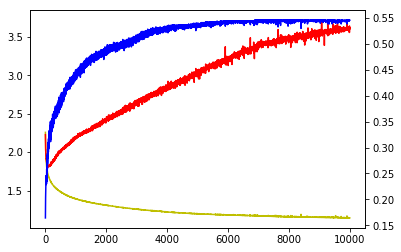

In [45]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.train_loss, 'y', label='train loss')
loss_ax.plot(custom_hist.val_loss, 'r', label='val loss')

acc_ax.plot(custom_hist.train_acc, 'b', label='train acc')
acc_ax.plot(custom_hist.val_acc, 'g', labe='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

학습 모니터링 결과는 첫번째 예제와 유사하게 나온것을 확인 할 수 있다.<br>